In [1]:
!pip install virtualenv
!mkdir my_virtualenv
%cd my_virtualenv
!virtualenv my_env
!source my_env/bin/activate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 36.2 MB/s eta 0:00:00
/content/my_virtualenv
created virtual environment CPython3.10.12.final.0-64 in 1225ms
  creator CPython3Posix(dest=/content/my_virtualenv/my_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.1.0, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/Gold Price.csv")
data.head()


,Name,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,US dollar.1,...,Vietnamese dong,Egyptian pound,Korean won,Euro.1,Russian ruble,US dollar.2,South African rand,Chinese renmimbi.1,Canadian dollar.1,Australian dollar
0,12/29/1978,78.53,55.93,NaN,64.00,NaN,NaN,NaN,NaN,78.53,...,NaN,NaN,NaN,55.93,NaN,78.53,NaN,NaN,NaN,NaN
1,1/1/1979,78.53,55.93,NaN,64.00,NaN,NaN,NaN,NaN,78.53,...,NaN,NaN,NaN,55.93,NaN,78.53,NaN,NaN,NaN,NaN
2,1/2/1979,78.80,56.02,132.96,64.43,59.66,90.97,14.66,NaN,78.80,...,NaN,NaN,31.05,56.02,NaN,78.80,11.49,NaN,59.66,41.27
3,1/3/1979,75.96,54.68,134.67,62.42,59.81,92.56,14.73,NaN,75.96,...,NaN,NaN,31.21,54.68,NaN,75.96,11.35,NaN,59.81,41.13
4,1/4/1979,77.54,55.82,134.53,63.97,59.75,92.69,14.81,NaN,77.54,...,NaN,NaN,31.38,55.82,NaN,77.54,11.40,NaN,59.75,41.47


In [4]:
data.shape

(11581, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11581 entries, 0 to 11580
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                11581 non-null  object 
 1   US dollar           11581 non-null  float64
 2   Euro                11581 non-null  float64
 3   Japanese yen        11579 non-null  float64
 4   Pound sterling      11581 non-null  float64
 5   Canadian dollar     11579 non-null  float64
 6   Swiss franc         11579 non-null  float64
 7   Indian rupee        11579 non-null  float64
 8   Chinese renmimbi    10010 non-null  float64
 9   US dollar.1         11581 non-null  float64
 10  Turkish lira        10536 non-null  float64
 11  Saudi riyal         11579 non-null  float64
 12  Indonesian rupiah   11579 non-null  float64
 13  UAE dirham          11579 non-null  float64
 14  Thai baht           11579 non-null  float64
 15  Vietnamese dong     8730 non-null   float64
 16  Egyp

In [6]:
nulldata = data.isnull().sum()
nulldata[nulldata>0]


Japanese yen             2
Canadian dollar          2
Swiss franc              2
Indian rupee             2
Chinese renmimbi      1571
Turkish lira          1045
Saudi riyal              2
Indonesian rupiah        2
UAE dirham               2
Thai baht                2
Vietnamese dong       2851
Egyptian pound        2591
Korean won               2
Russian ruble         3661
South African rand       2
Chinese renmimbi.1    1571
Canadian dollar.1        2
Australian dollar        2
dtype: int64

In [7]:
data = data.rename(columns = {"Name":"Date"})
data.head()

,Date,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,US dollar.1,...,Vietnamese dong,Egyptian pound,Korean won,Euro.1,Russian ruble,US dollar.2,South African rand,Chinese renmimbi.1,Canadian dollar.1,Australian dollar
0,12/29/1978,78.53,55.93,NaN,64.00,NaN,NaN,NaN,NaN,78.53,...,NaN,NaN,NaN,55.93,NaN,78.53,NaN,NaN,NaN,NaN
1,1/1/1979,78.53,55.93,NaN,64.00,NaN,NaN,NaN,NaN,78.53,...,NaN,NaN,NaN,55.93,NaN,78.53,NaN,NaN,NaN,NaN
2,1/2/1979,78.80,56.02,132.96,64.43,59.66,90.97,14.66,NaN,78.80,...,NaN,NaN,31.05,56.02,NaN,78.80,11.49,NaN,59.66,41.27
3,1/3/1979,75.96,54.68,134.67,62.42,59.81,92.56,14.73,NaN,75.96,...,NaN,NaN,31.21,54.68,NaN,75.96,11.35,NaN,59.81,41.13
4,1/4/1979,77.54,55.82,134.53,63.97,59.75,92.69,14.81,NaN,77.54,...,NaN,NaN,31.38,55.82,NaN,77.54,11.40,NaN,59.75,41.47


In [8]:
data['Date'] = pd.to_datetime(data['Date'],format = "%m/%d/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
data['Day'] = data['Date'].dt.day
data.tail()


,Date,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,US dollar.1,...,Russian ruble,US dollar.2,South African rand,Chinese renmimbi.1,Canadian dollar.1,Australian dollar,Year,Month,Week,Day
11576,2023-05-15,701.84,758.52,847.09,933.43,616.47,457.62,1359.32,589.37,701.84,...,2591.61,701.84,2272.44,589.37,616.47,643.75,2023,5,20,15
11577,2023-05-16,697.52,753.78,844.10,928.72,611.10,455.10,1349.43,586.75,697.52,...,2610.43,697.52,2261.25,586.75,611.10,642.19,2023,5,20,16
11578,2023-05-17,686.03,744.52,835.80,915.59,602.36,449.11,1330.05,579.92,686.03,...,2562.67,686.03,2250.99,579.92,602.36,633.61,2023,5,20,17
11579,2023-05-18,681.13,742.70,837.01,913.37,598.01,449.12,1323.86,578.30,681.13,...,2532.52,681.13,2247.36,578.30,598.01,631.84,2023,5,20,18
11580,2023-05-19,681.58,741.99,836.91,911.77,599.45,447.68,1325.86,578.21,681.58,...,2534.20,681.58,2256.24,578.21,599.45,628.04,2023,5,20,19


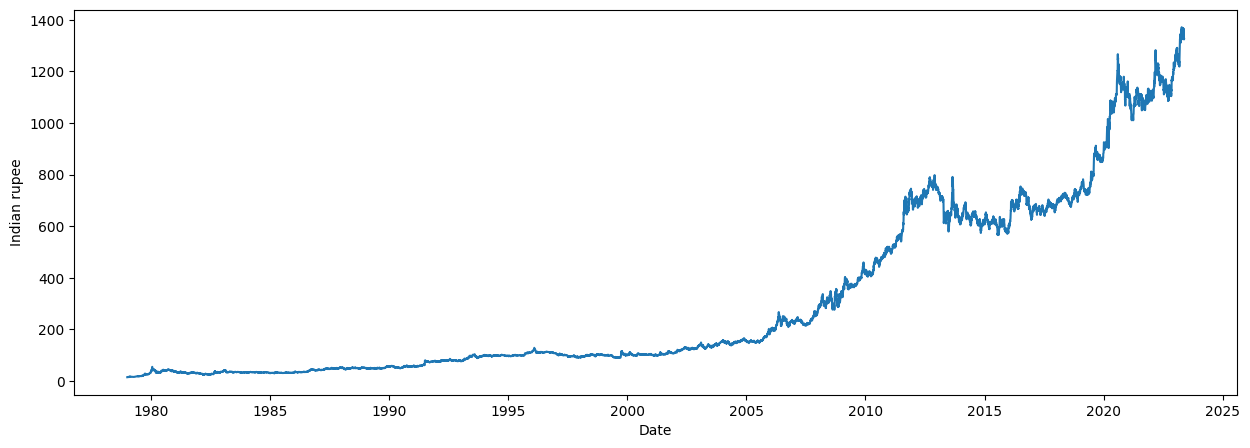

In [9]:
plt.subplots(figsize = (15,5))
sns.lineplot(data,x = data['Date'], y = data['Indian rupee'])
plt.show()

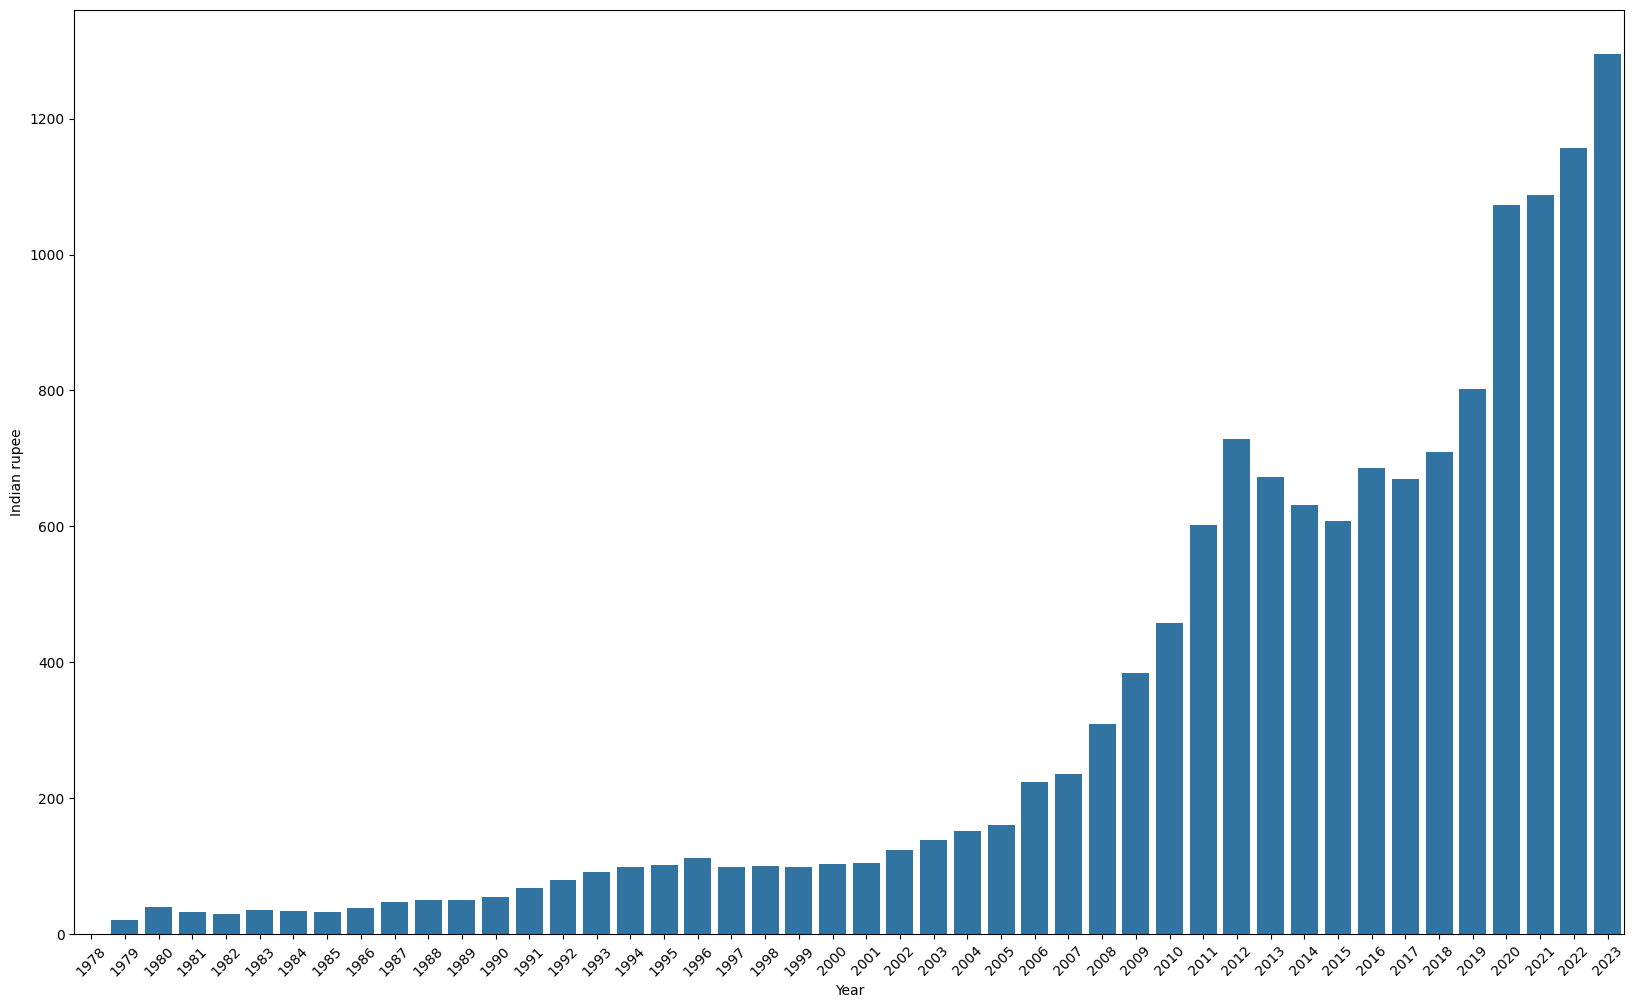

In [10]:

plt.subplots(figsize = (20,12))
sns.barplot(data,x = data['Year'], y = data['Indian rupee'],ci=None)
plt.xticks(rotation = 45)
plt.show()

In [11]:
data10 = data[(data['Year']>2013)]
data10.shape


(2448, 29)

In [12]:
dataIndia = data10[['Date','Year','Month','Week','Day','Indian rupee']]
dataIndia.shape

(2448, 6)

In [13]:
dataIndia.head()

,Date,Year,Month,Week,Day,Indian rupee
9133,2014-01-01,2014,1,1,1,609.17
9134,2014-01-02,2014,1,1,2,623.05
9135,2014-01-03,2014,1,1,3,627.90
9136,2014-01-06,2014,1,2,6,635.28
9137,2014-01-07,2014,1,2,7,625.47


In [14]:
dataIndia.isnull().sum()

Date            0
Year            0
Month           0
Week            0
Day             0
Indian rupee    0
dtype: int64

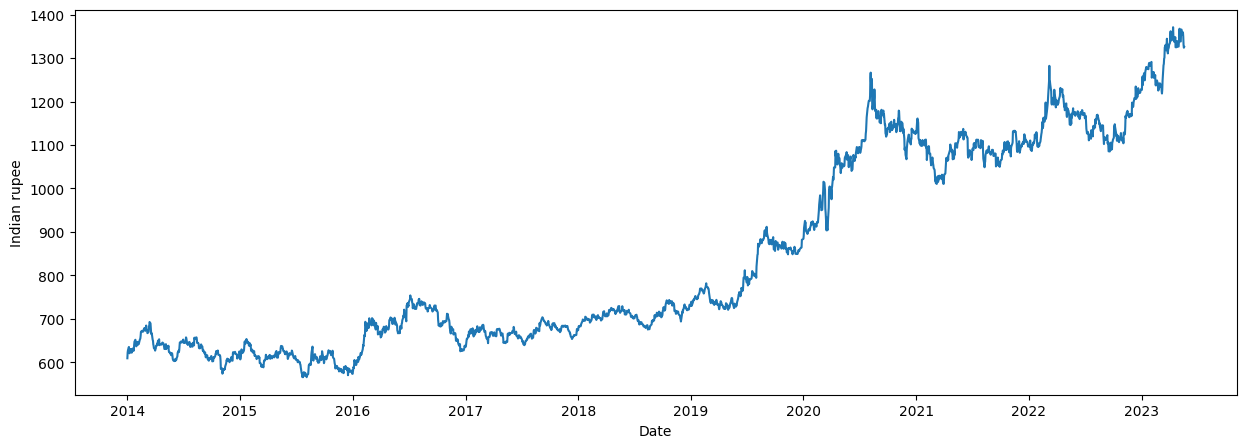

In [15]:
plt.subplots(figsize = (15,5))
sns.lineplot(dataIndia,x = dataIndia['Date'], y = dataIndia['Indian rupee'])
plt.show()

In [16]:
years = list(dataIndia['Year'].value_counts().index.sort_values())
years

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [17]:
def Yearly_data(year):
 grp = dataIndia[(dataIndia.Year == year)]
 plt.subplots(figsize = (20,5))
 sns.lineplot(grp,x = grp.Month, y = grp['Indian rupee'])
 plt.title(f'Year {year}')
 plt.show()


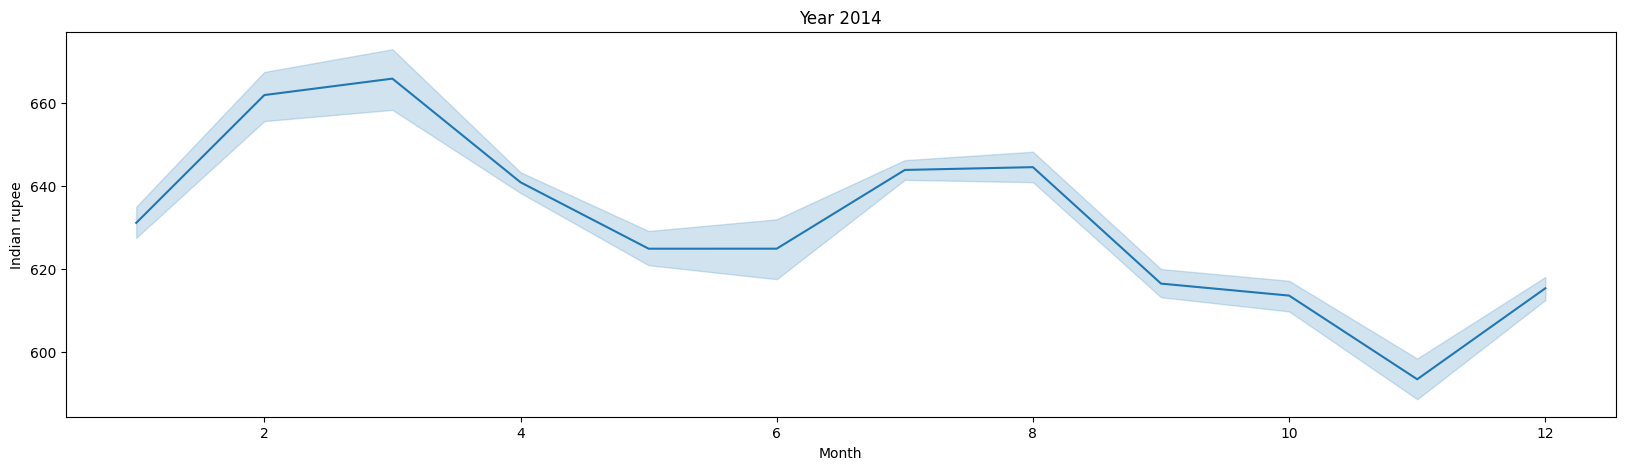

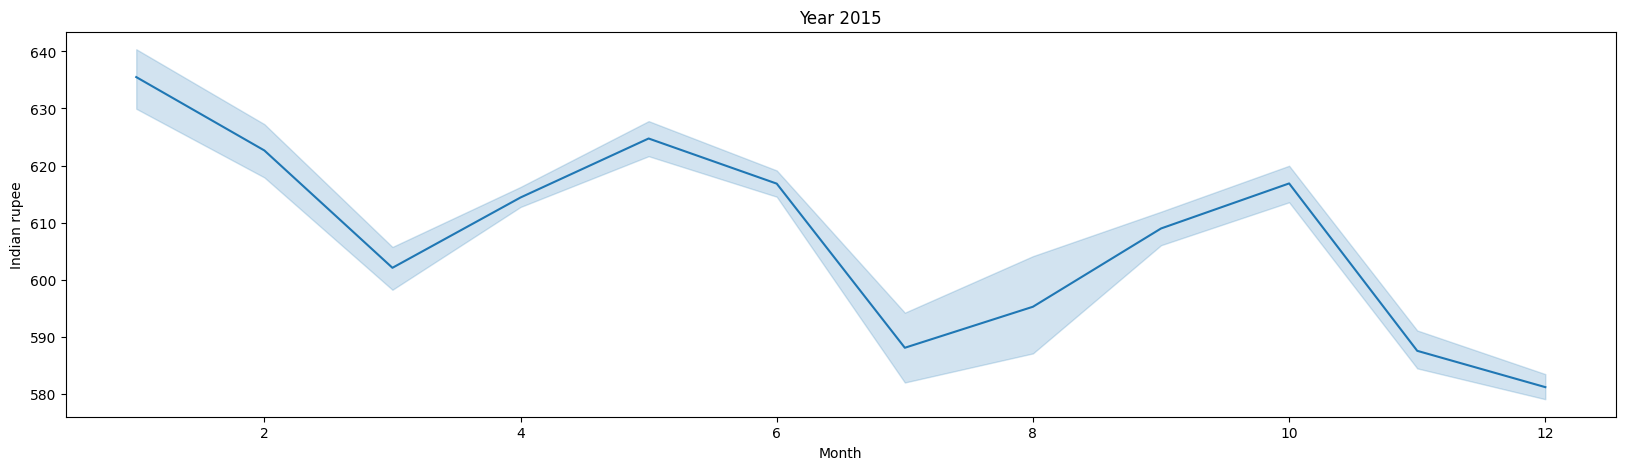

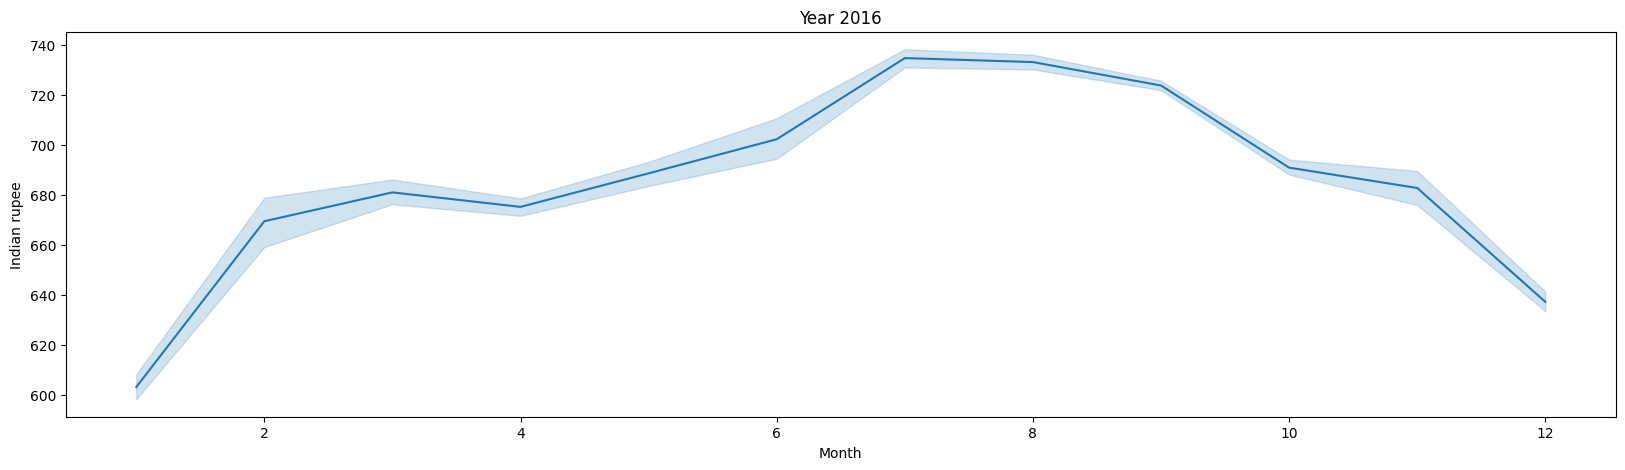

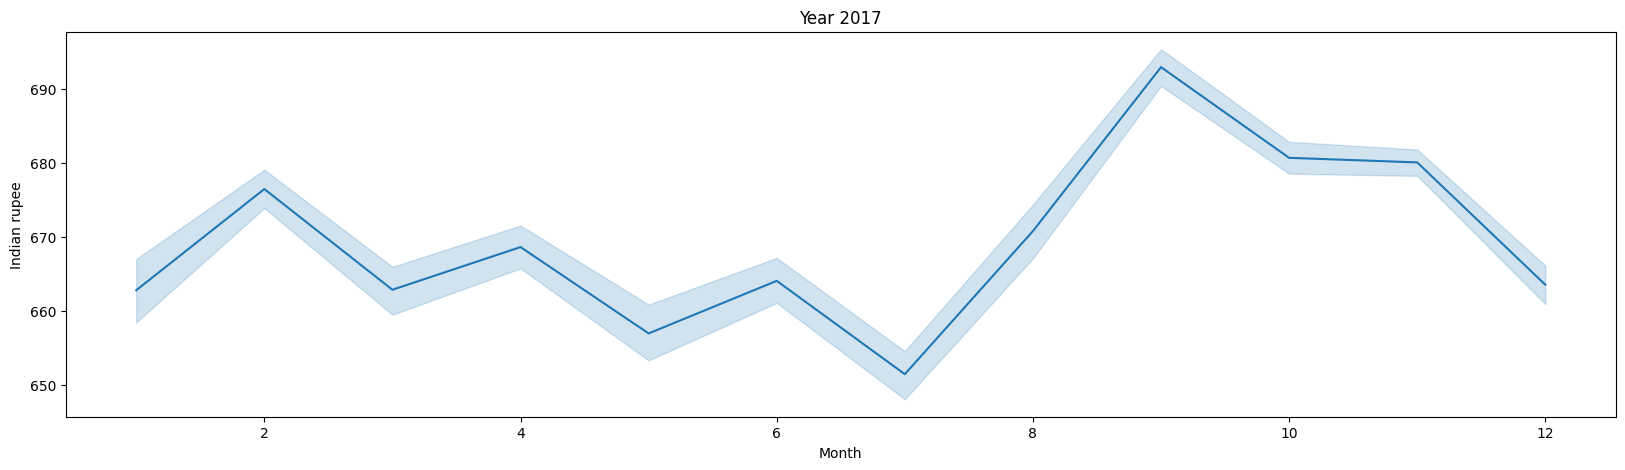

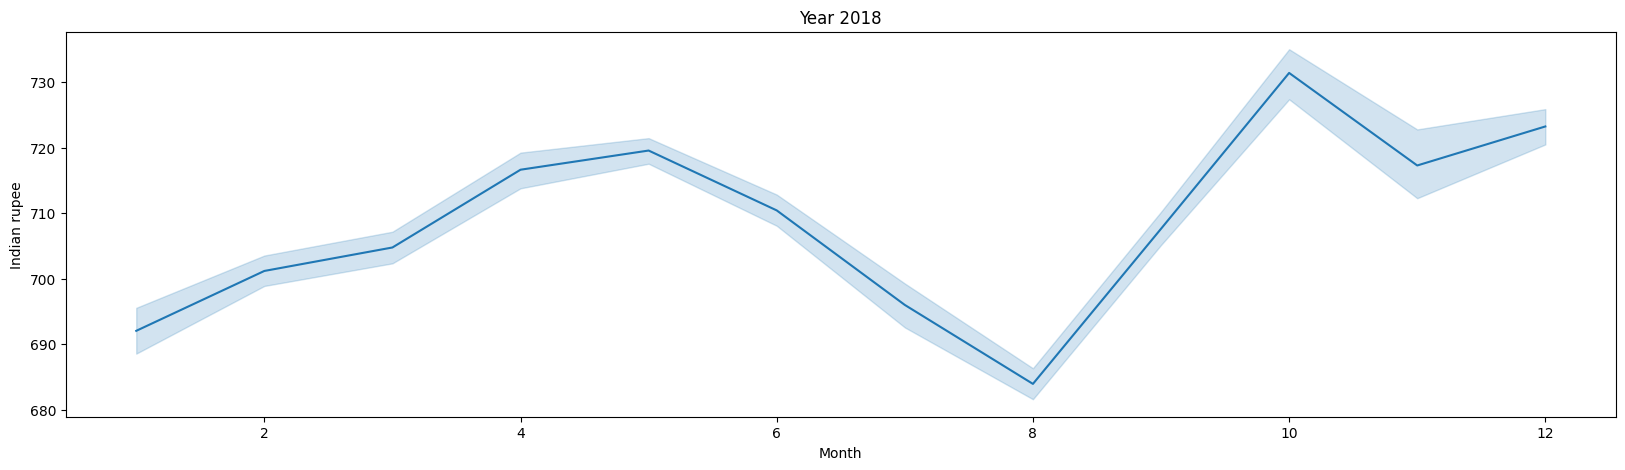

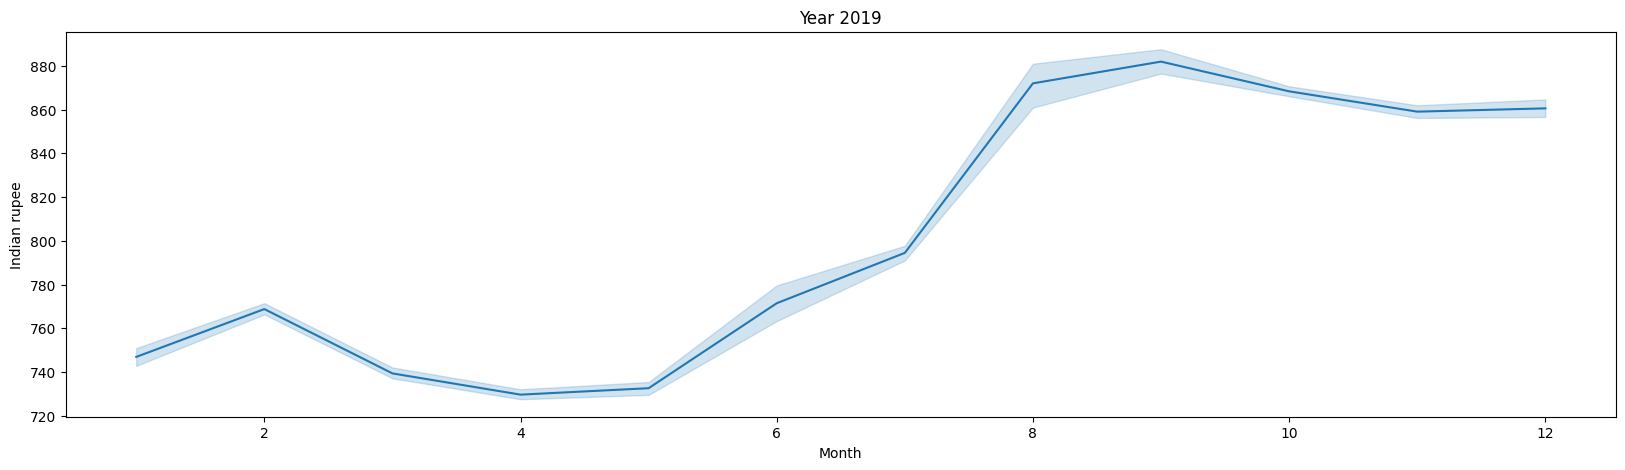

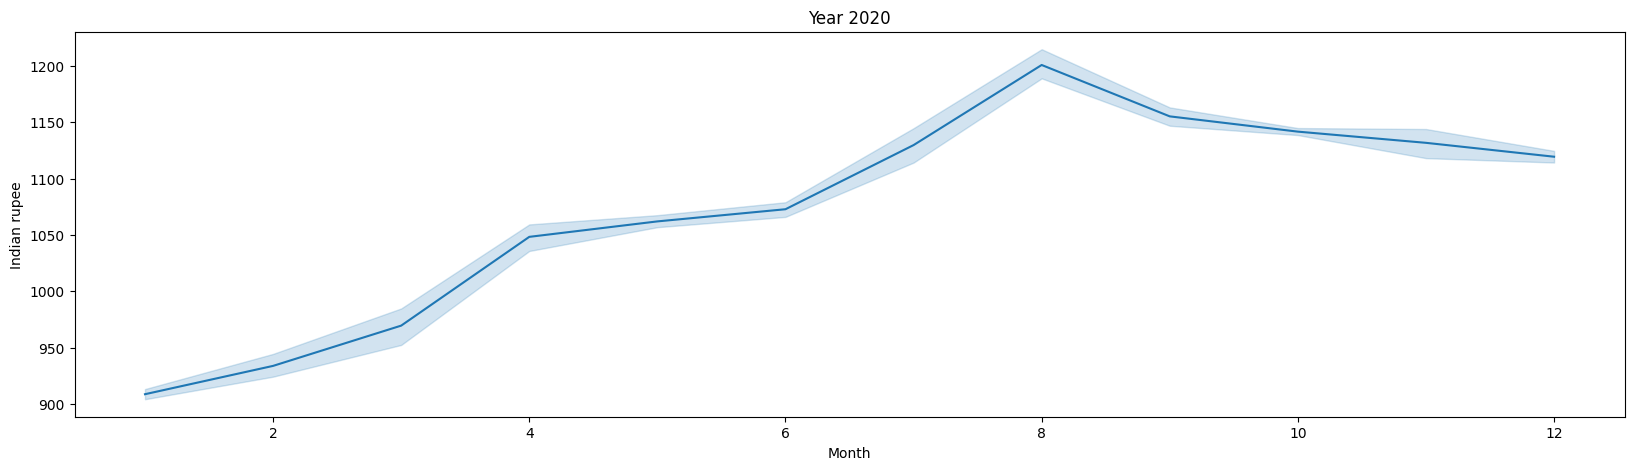

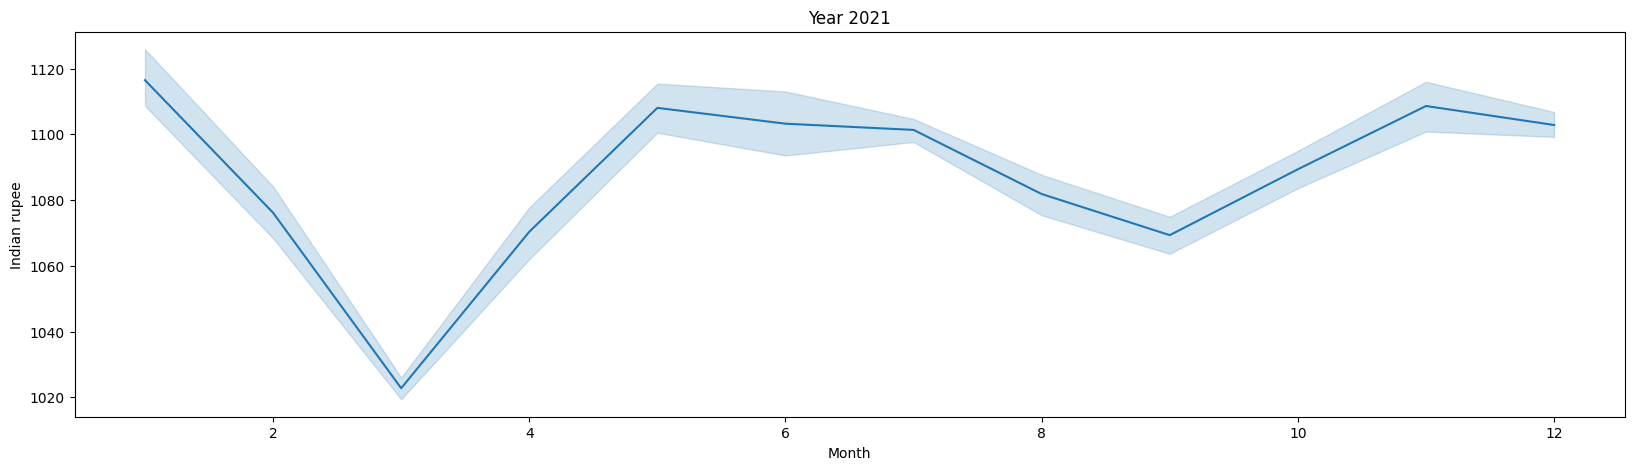

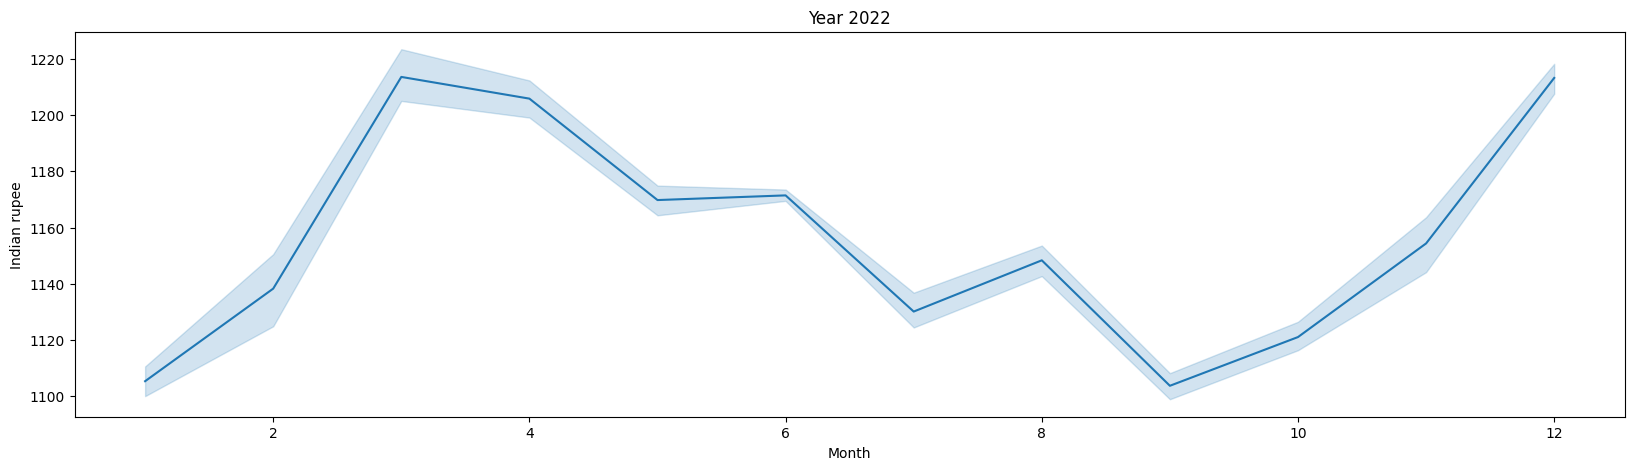

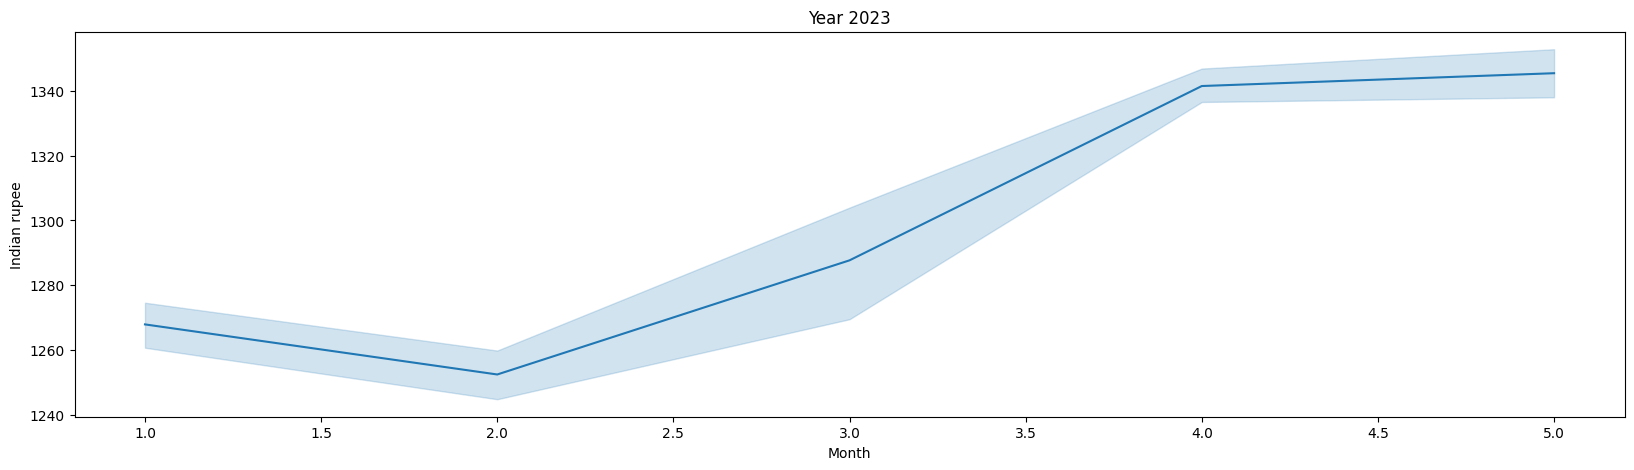

In [18]:
for i in range(len(years)):
 Yearly_data(years[i])

It's tough to say which month is best to buy, but if we go with the majority, April to August will be the best month for buying gold as found
from the past 10 years data.


In [19]:
dataIndia.head()

,Date,Year,Month,Week,Day,Indian rupee
9133,2014-01-01,2014,1,1,1,609.17
9134,2014-01-02,2014,1,1,2,623.05
9135,2014-01-03,2014,1,1,3,627.90
9136,2014-01-06,2014,1,2,6,635.28
9137,2014-01-07,2014,1,2,7,625.47


In [20]:
dataIndia.set_index(dataIndia['Date'],inplace = True)
dataIndia = dataIndia.drop(columns = 'Date')
dataIndia.tail()


,Year,Month,Week,Day,Indian rupee
Date,,,,,
2023-05-15,2023,5,20,15,1359.32
2023-05-16,2023,5,20,16,1349.43
2023-05-17,2023,5,20,17,1330.05
2023-05-18,2023,5,20,18,1323.86
2023-05-19,2023,5,20,19,1325.86


In [22]:
def check_stationarity(series):
 from statsmodels.tsa.stattools import adfuller
 result = adfuller(series)
 print('ADF Statistic: %f' % result[0])
 print('p-value: %f' % result[1])
 print('Critical Values:')
 for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
 if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
  print("\u001b[32mStationary\u001b[0m")
 else:
  print("\x1b[31mNon-stationary\x1b[0m")

In [23]:
 from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [24]:
check_stationarity(dataIndia['Indian rupee'])

ADF Statistic: 0.327753
p-value: 0.978583
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Non-stationary


In [25]:
dataIndia['INR_diff'] = dataIndia['Indian rupee'].diff().fillna(0)
check_stationarity(dataIndia['INR_diff'])

ADF Statistic: -14.456611
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


In [26]:
dataIndia

,Year,Month,Week,Day,Indian rupee,INR_diff
Date,,,,,,
2014-01-01,2014,1,1,1,609.17,0.00
2014-01-02,2014,1,1,2,623.05,13.88
2014-01-03,2014,1,1,3,627.90,4.85
2014-01-06,2014,1,2,6,635.28,7.38
2014-01-07,2014,1,2,7,625.47,-9.81
...,...,...,...,...,...,...
2023-05-15,2023,5,20,15,1359.32,2.29
2023-05-16,2023,5,20,16,1349.43,-9.89
2023-05-17,2023,5,20,17,1330.05,-19.38


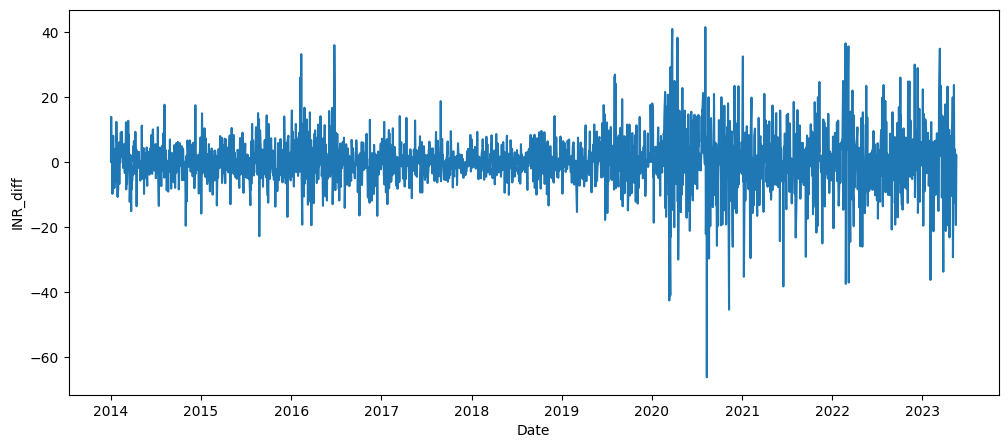

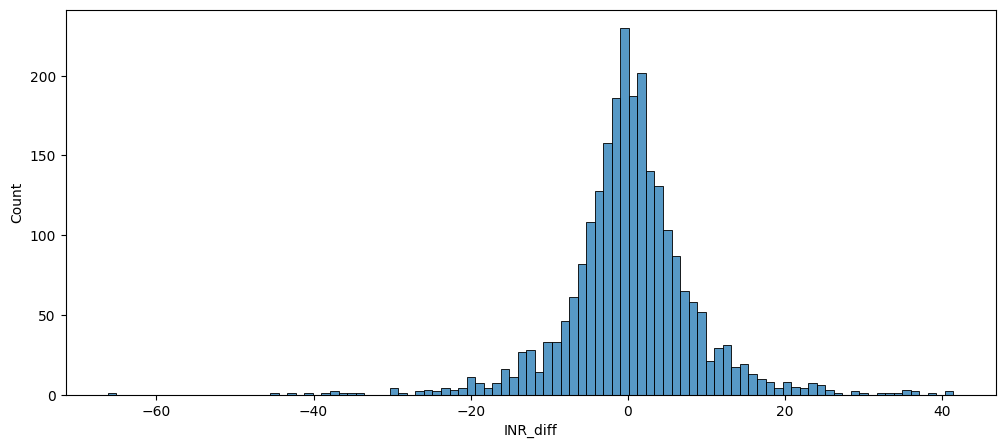

In [27]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
sns.lineplot(data=dataIndia, x=dataIndia.index, y='INR_diff')
plt.show()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
sns.histplot(dataIndia['INR_diff'] )
plt.show()


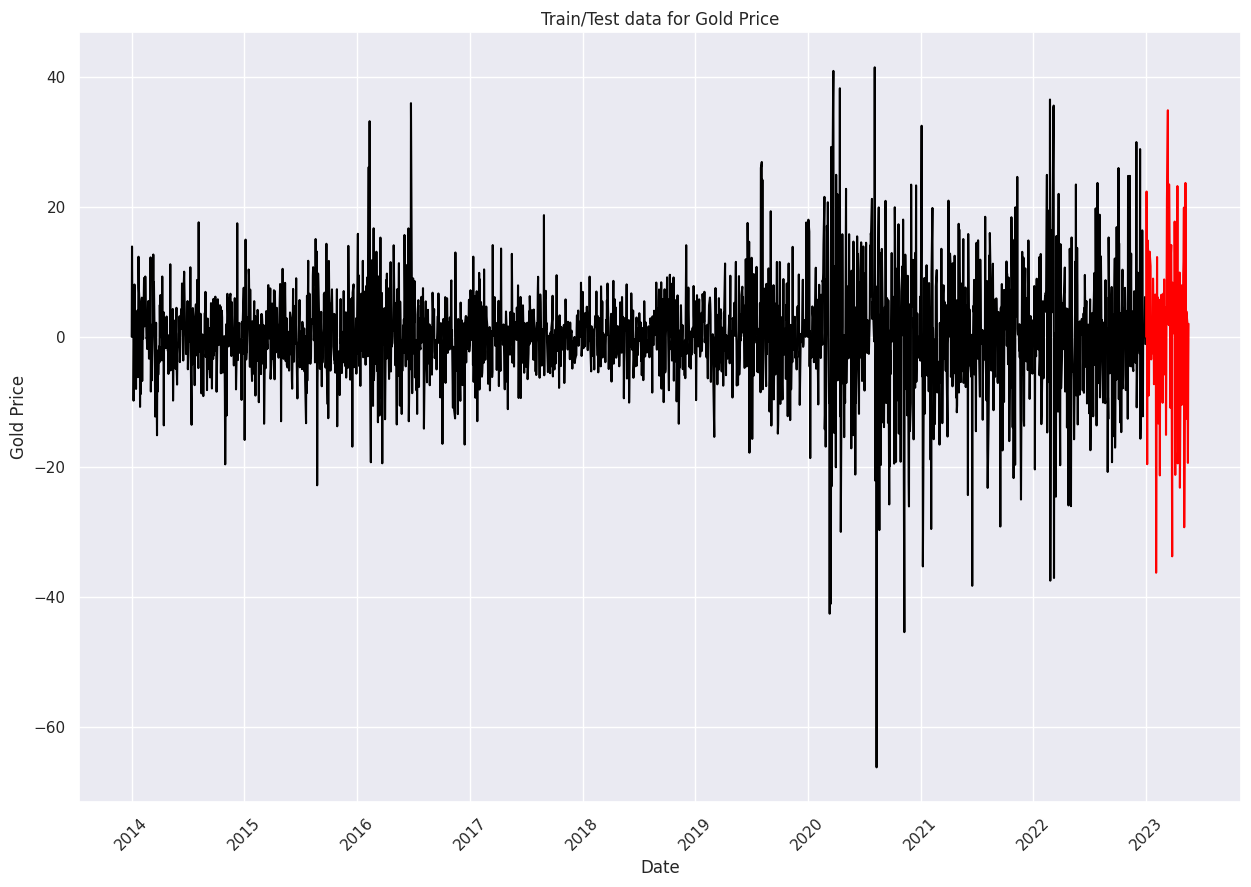

In [28]:
train = dataIndia[dataIndia.index<pd.to_datetime("2023-01-01",format = "%Y-%m-%d")]
test = dataIndia[dataIndia.index>pd.to_datetime("2023-01-01",format = "%Y-%m-%d")]
train = train[['INR_diff']]
test = test[['INR_diff']]
sns.set()
plt.subplots(figsize = (15,10))
plt.plot(train,color ='black')
plt.plot(test,color = 'red')
plt.ylabel("Gold Price")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.title("Train/Test data for Gold Price")
plt.show()

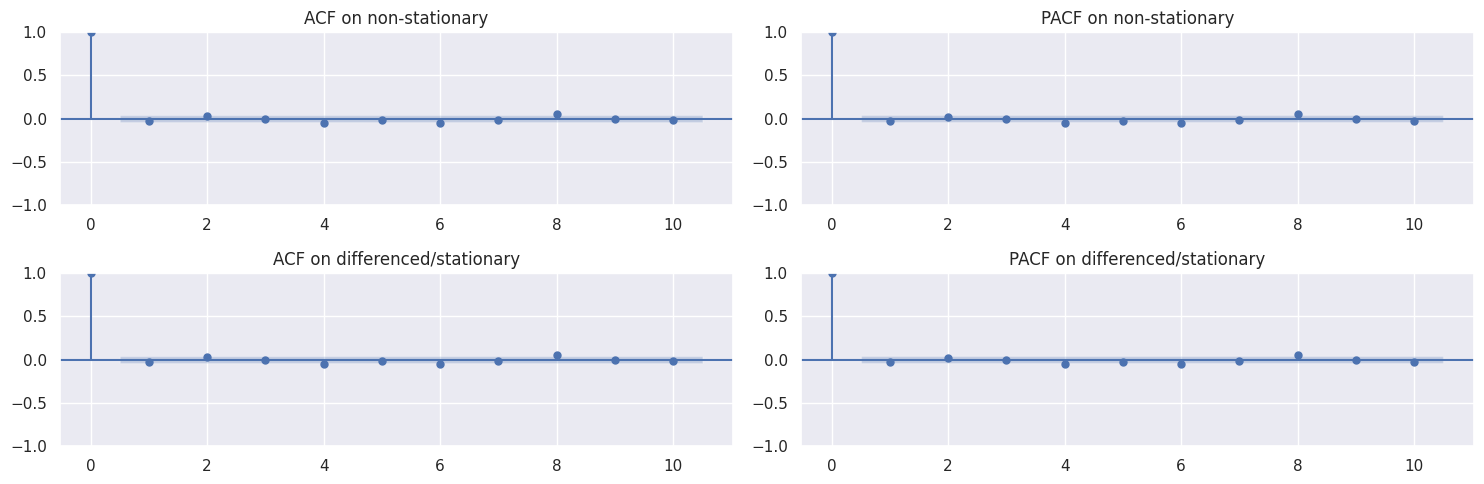

In [29]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
plot_acf(train['INR_diff'], lags=10, ax=ax[0, 0], title='ACF on non-stationary')
plot_pacf(train['INR_diff'], lags=10, ax=ax[0, 1], method='ols', title='PACF on non-stationary')
plot_acf(train['INR_diff'], lags=10, ax=ax[1, 0], title='ACF on differenced/stationary')
plot_pacf(train['INR_diff'], lags=10, ax=ax[1, 1], method='ols', title='PACF on differenced/stationary')
plt.tight_layout()
plt.show()


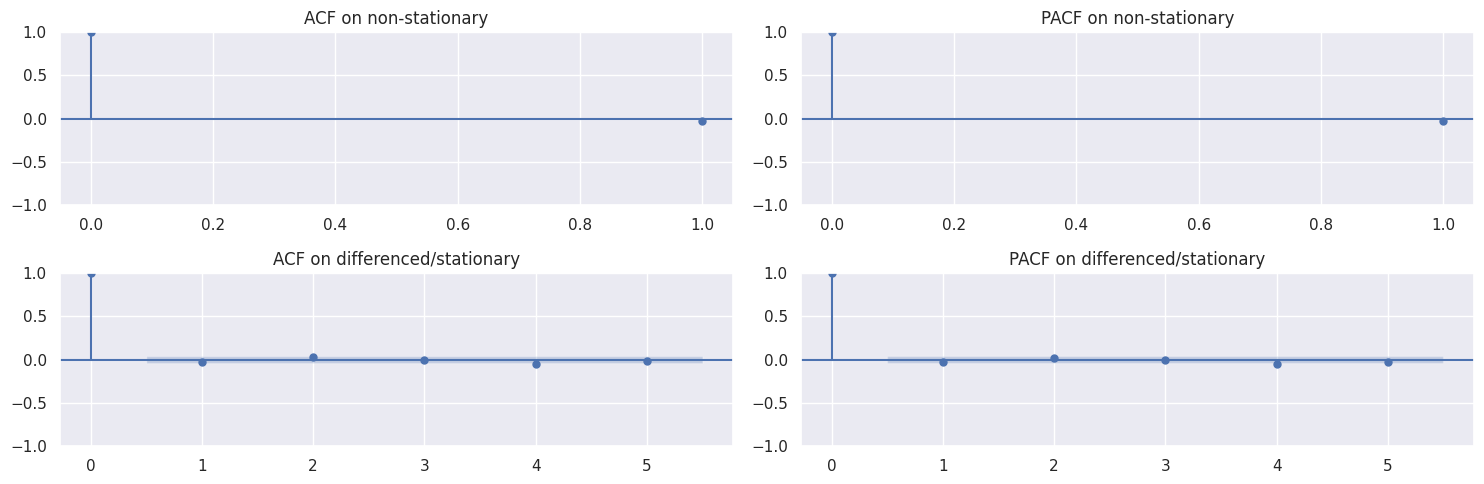

In [30]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
plot_acf(train['INR_diff'], lags=1, ax=ax[0, 0], title='ACF on non-stationary')
plot_pacf(train['INR_diff'], lags=1, ax=ax[0, 1], method='ols', title='PACF on non-stationary')
plot_acf(train['INR_diff'], lags=5, ax=ax[1, 0], title='ACF on differenced/stationary')
plot_pacf(train['INR_diff'], lags=5, ax=ax[1, 1], method='ols', title='PACF on differenced/stationary')
plt.tight_layout()
plt.show()


In [32]:
def check_order(p,d,q):
 y = train['INR_diff']
 from statsmodels.tsa.arima.model import ARIMA
 ARIMAmodel = ARIMA(y, order = (p,d,q))
 ARIMAmodel = ARIMAmodel.fit()
 print(ARIMAmodel.summary(),"\n")

 y_pred = ARIMAmodel.get_forecast(len(test.index))
 y_pred_df = y_pred.conf_int(alpha = 0.05)
 y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
 y_pred_df.index = test.index
 y_pred_out = y_pred_df["Predictions"]

 from sklearn.metrics import mean_squared_error
 arima_rmse = np.sqrt(mean_squared_error(test['INR_diff'].values, y_pred_df["Predictions"]))
 print("RMSE: ",arima_rmse,'\n')

 ARIMAmodel.plot_diagnostics(figsize = (20,12))


 sns.set()
 plt.subplots(figsize = (15,5))
 plt.plot(train,color ='black',label = 'Train')
 plt.plot(test,color = 'red',label = 'Test')
 plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
 plt.ylabel("Gold Price")
 plt.xlabel("Date")
 plt.xticks(rotation = 45)
 plt.title("Train/Test and predictions for Gold Price")
 plt.tight_layout()
 plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               INR_diff   No. Observations:                 2348
Model:                          ARIMA   Log Likelihood               -8211.769
Date:                Fri, 01 Mar 2024   AIC                          16427.537
Time:                        23:46:52   BIC                          16439.060
Sample:                    01-01-2014   HQIC                         16431.734
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2631      0.165      1.591      0.112      -0.061       0.587
sigma2        63.8632      0.924     69.133      0.000      62.053      65.674
Ljung-Box (L1) (Q):                   2.05   Jarque-

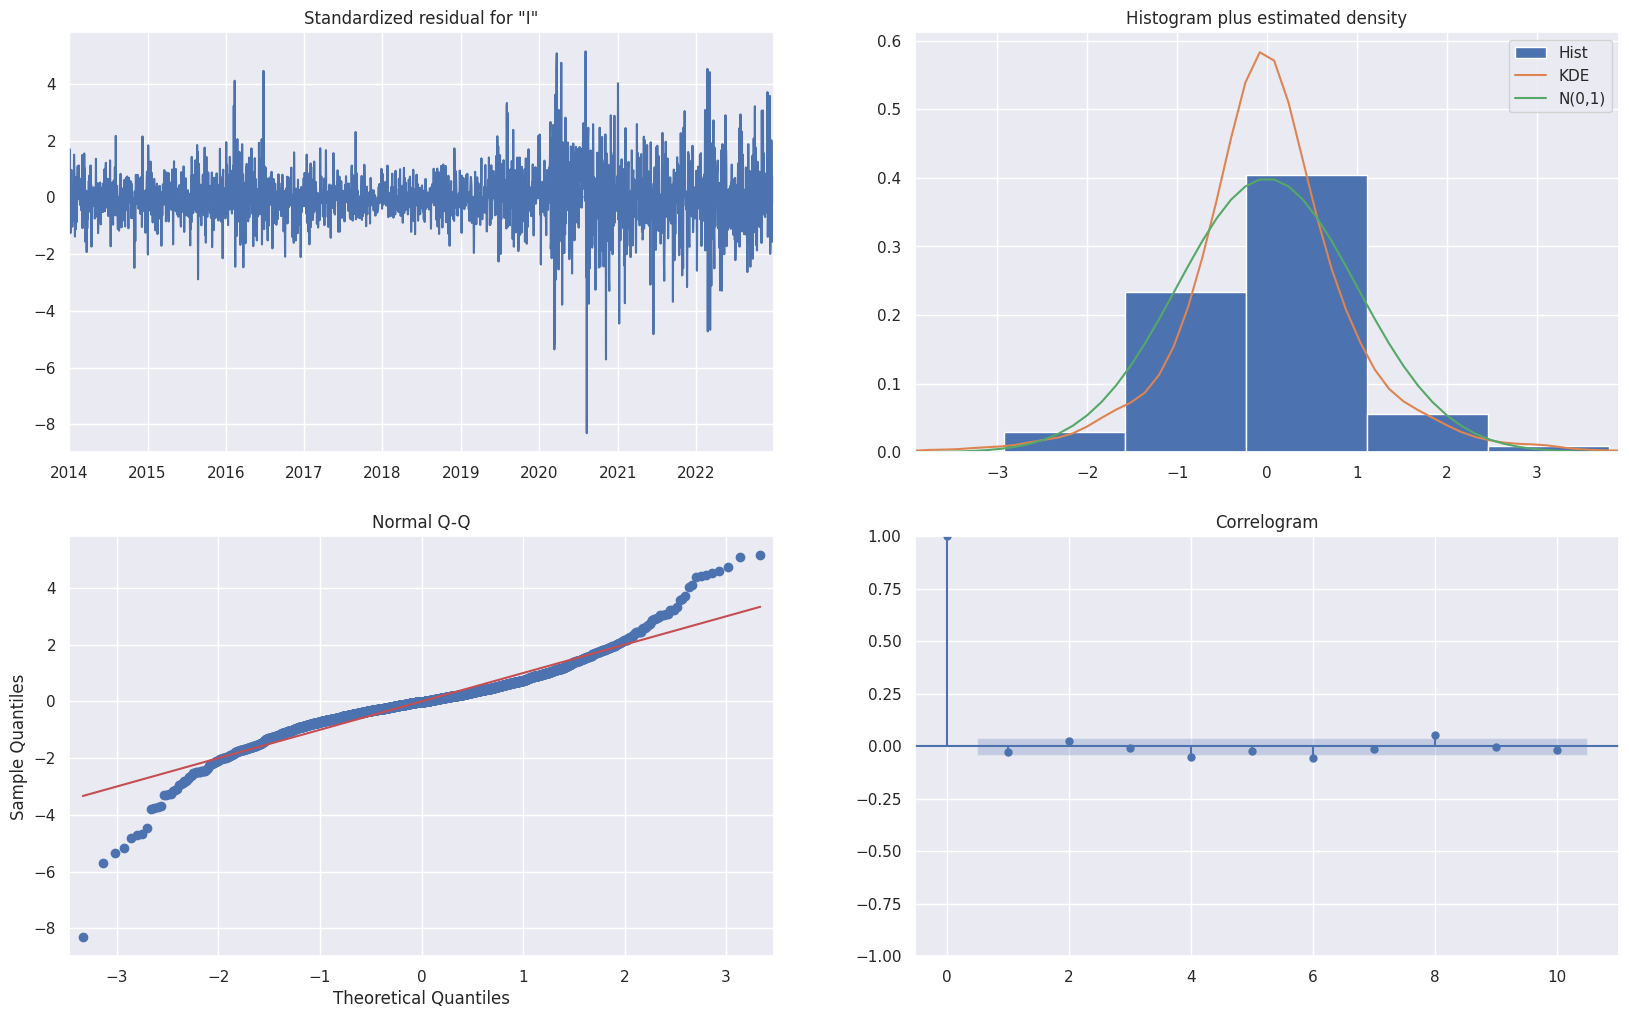

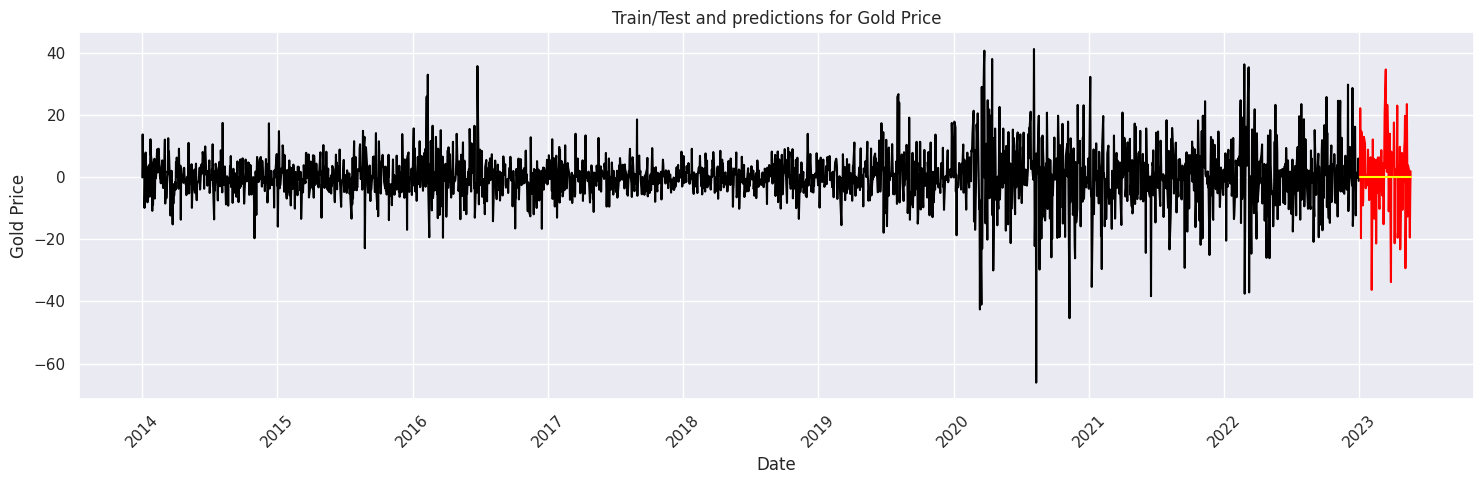

In [33]:
check_order(0,0,0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               INR_diff   No. Observations:                 2348
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9056.354
Date:                Fri, 01 Mar 2024   AIC                          18114.709
Time:                        23:48:16   BIC                          18120.470
Sample:                    01-01-2014   HQIC                         18116.807
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       131.5669      2.096     62.767      0.000     127.459     135.675
Ljung-Box (L1) (Q):                 650.50   Jarque-Bera (JB):              2190.15
Prob(Q):                              0.00   Pr

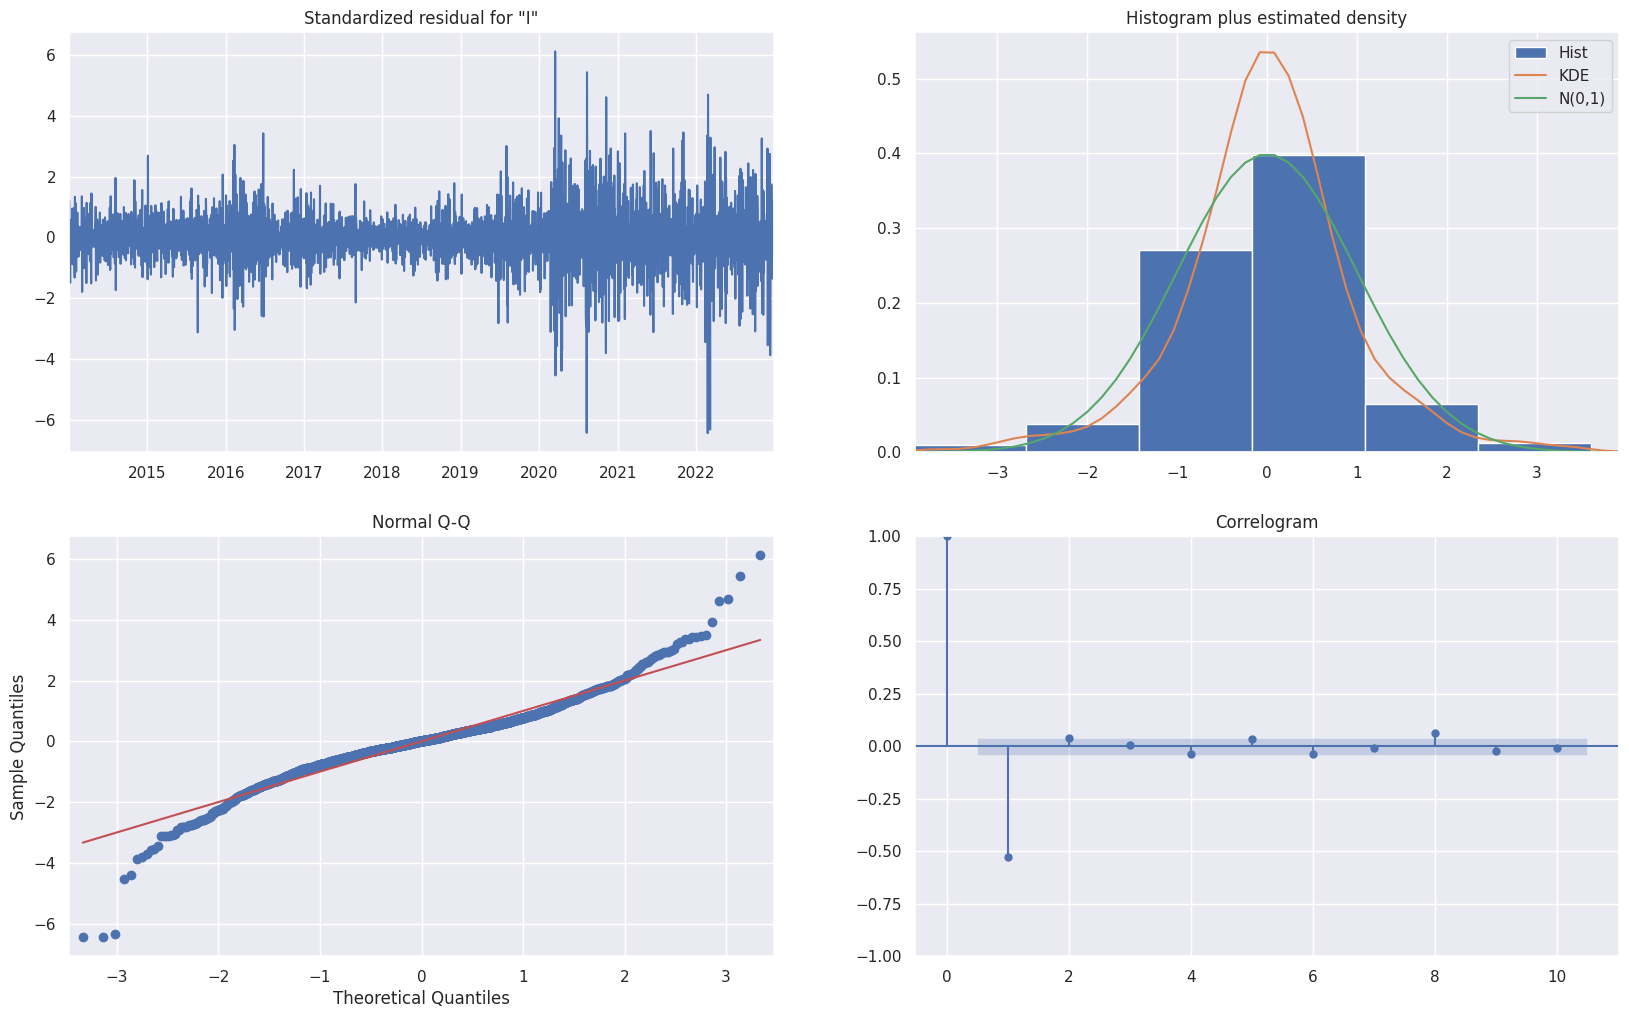

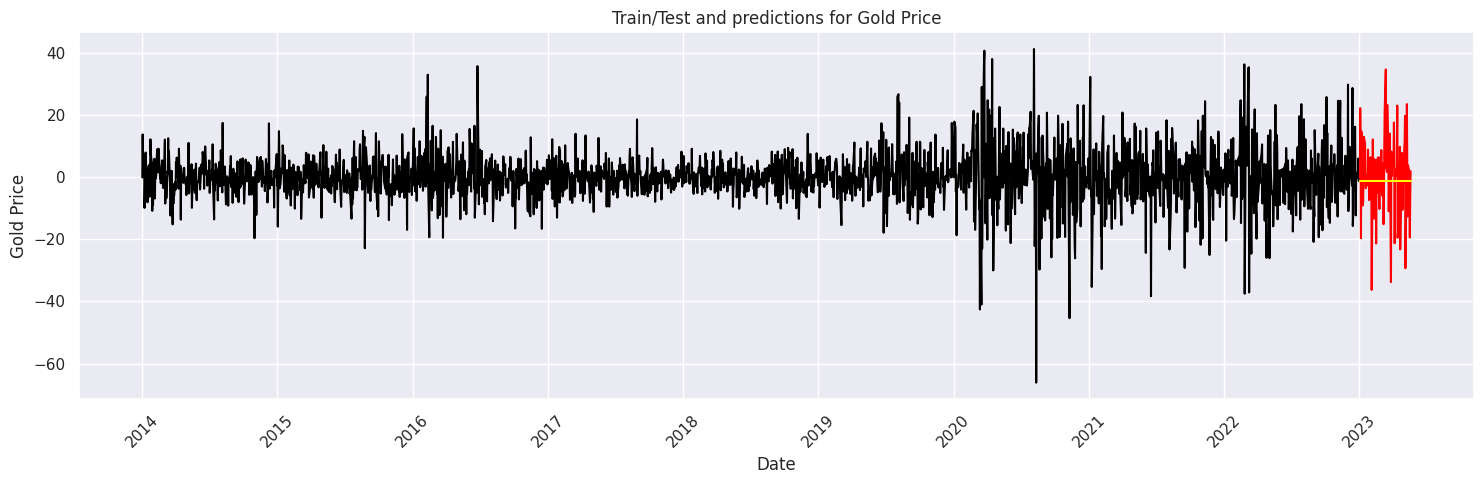

In [34]:

check_order(0,1,0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               INR_diff   No. Observations:                 2348
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8211.424
Date:                Fri, 01 Mar 2024   AIC                          16432.848
Time:                        23:48:49   BIC                          16461.652
Sample:                    01-01-2014   HQIC                         16443.339
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0286      0.015    -70.861      0.000      -1.057      -1.000
ar.L2         -0.0295      0.015     -2.037      0.042      -0.058      -0.001
ma.L1      -7.096e-06    377.485  -1.88e-08      1.0

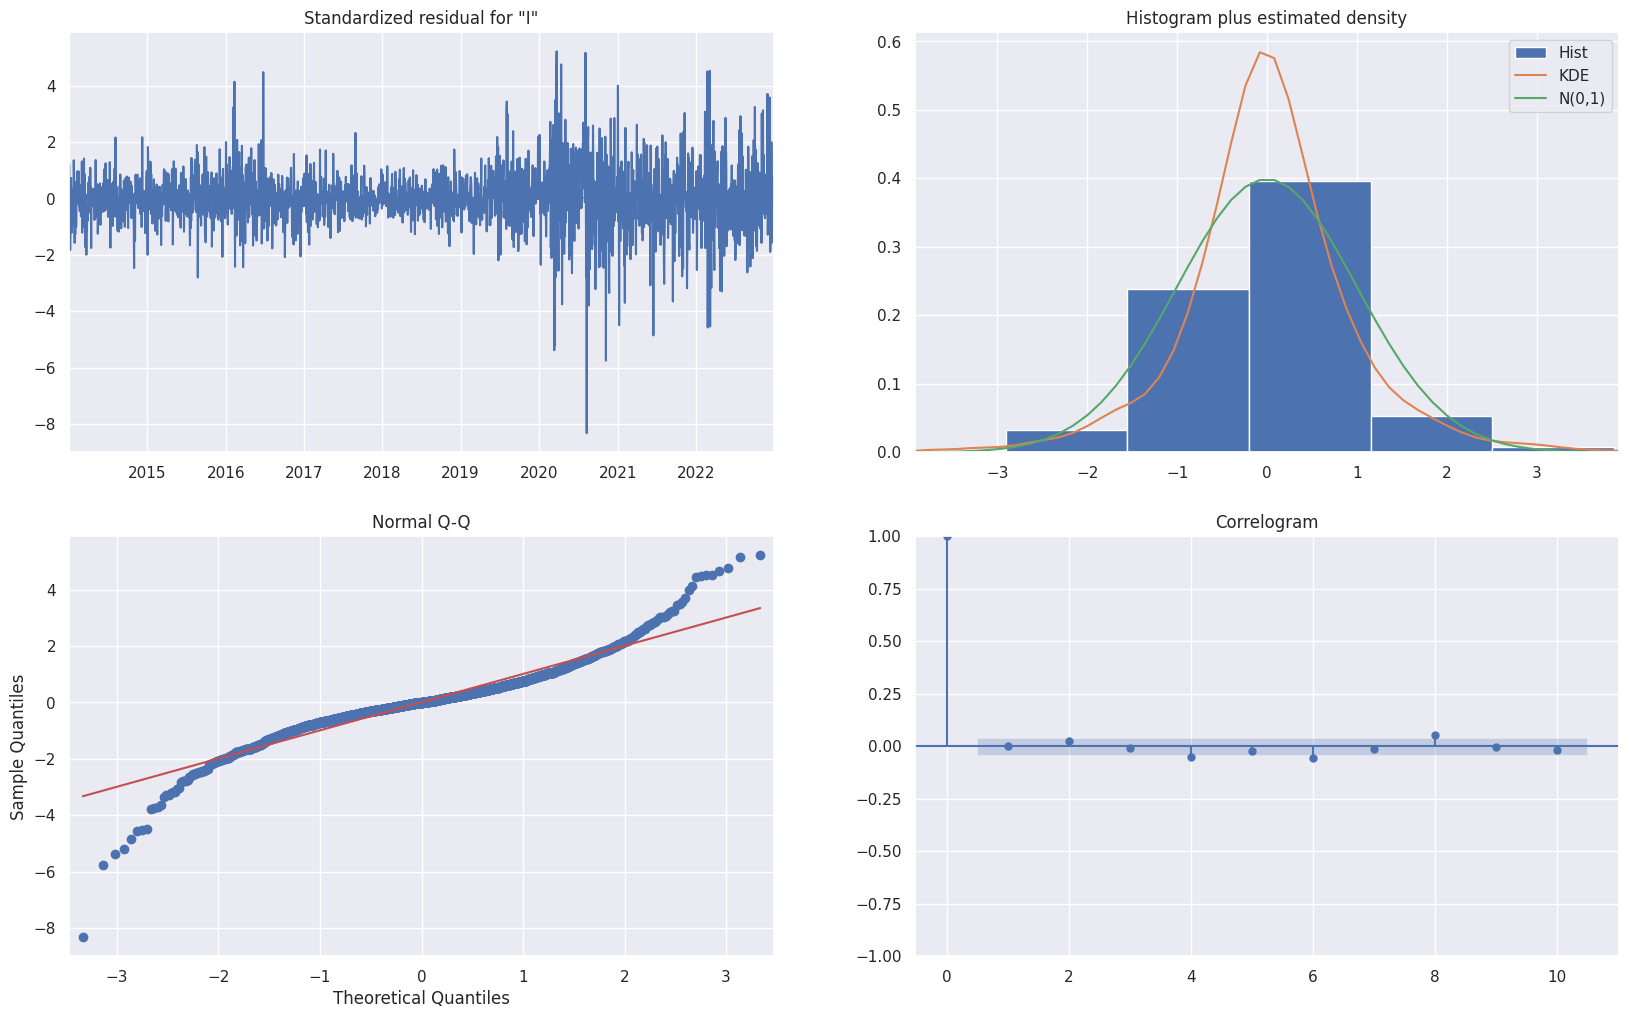

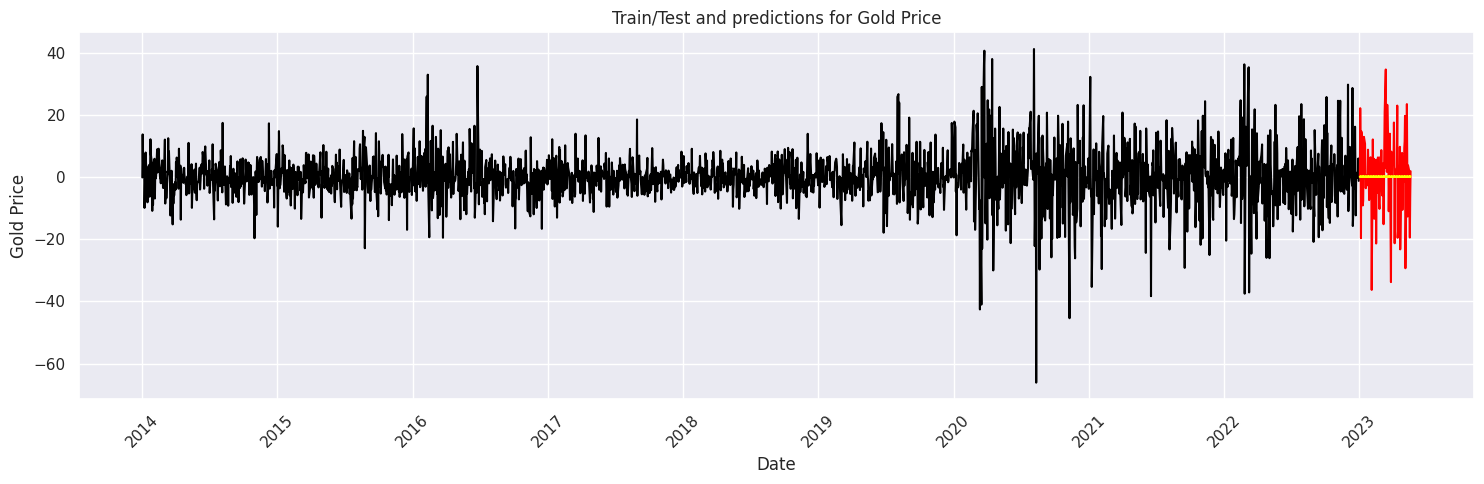

In [36]:
check_order(2,1,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               INR_diff   No. Observations:                 2348
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -8211.833
Date:                Fri, 01 Mar 2024   AIC                          16431.665
Time:                        23:48:56   BIC                          16454.709
Sample:                    01-01-2014   HQIC                         16440.058
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9939      0.011    -88.261      0.000      -1.016      -0.972
ma.L1         -0.0092      0.029     -0.319      0.750      -0.066       0.048
ma.L2         -0.9907      0.027    -36.775      0.0

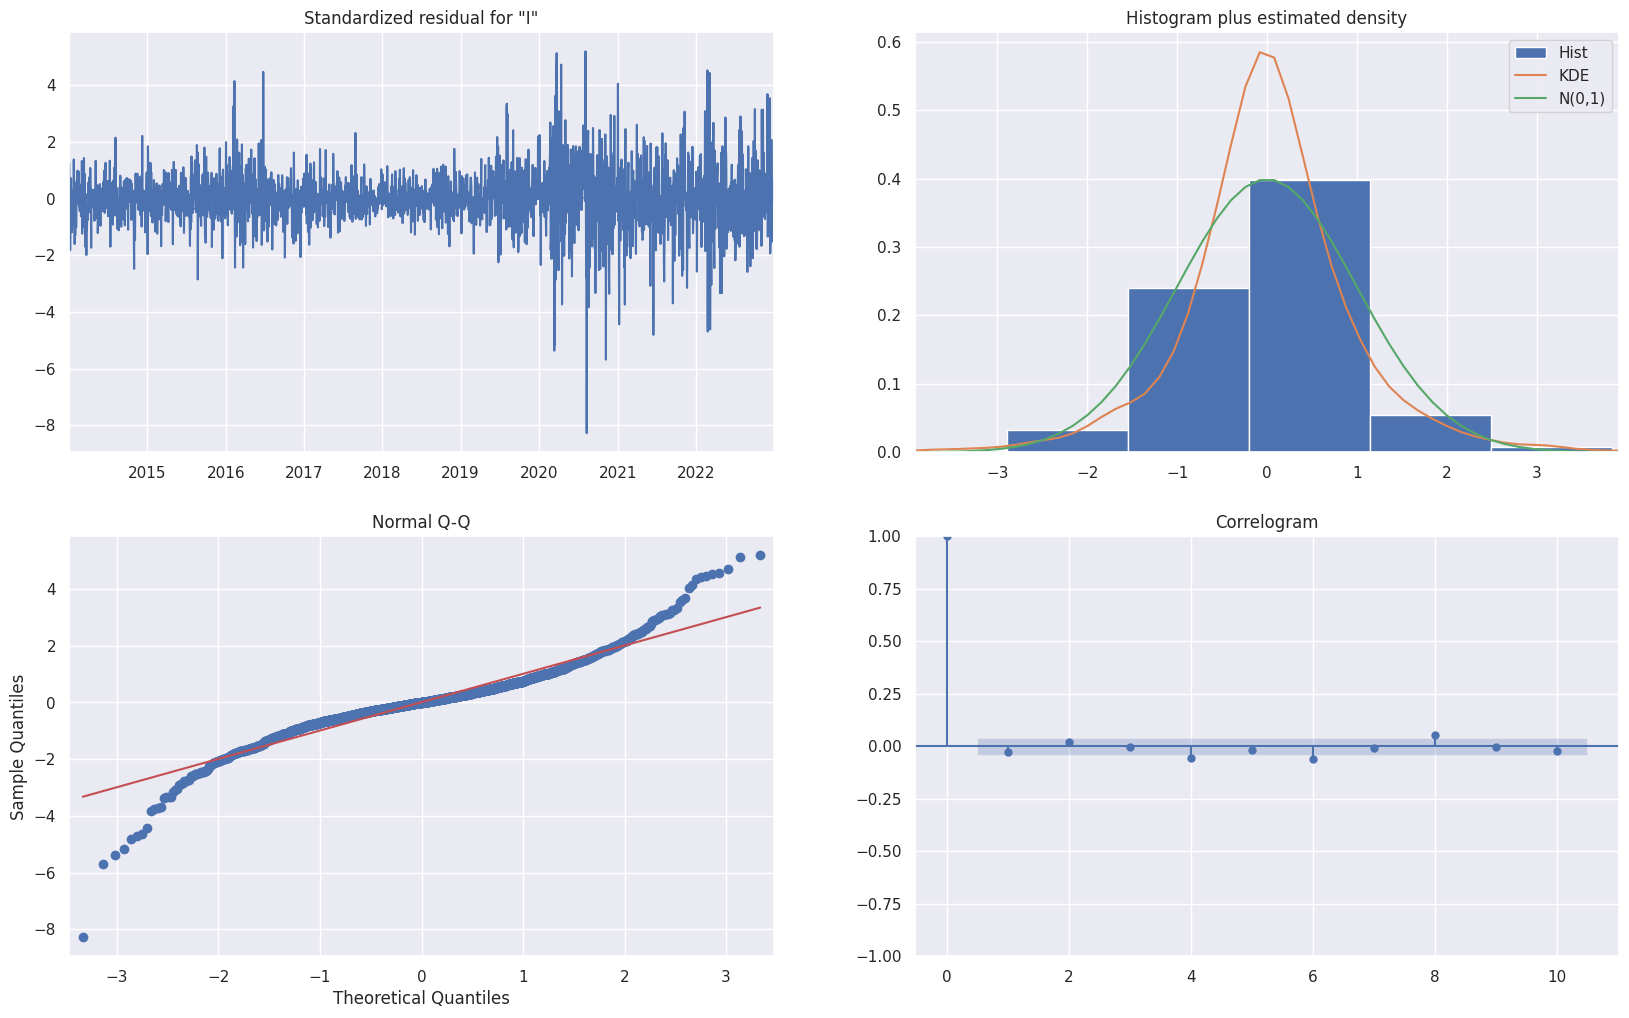

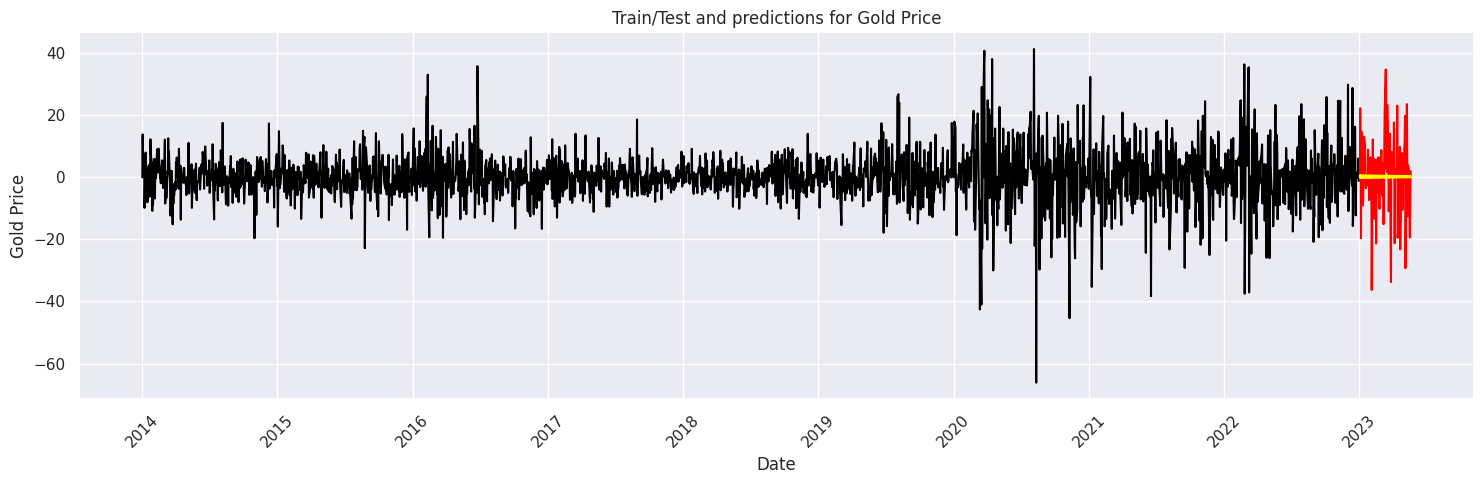

In [37]:
check_order(1,1,2)

In [38]:
def check_seasonal_order(p,d,q):
 y = dataIndia['INR_diff']
 from statsmodels.tsa.statespace.sarimax import SARIMAX
 SARIMAmodel = SARIMAX(y, order = (p,d,q),seasonal_order = (0,0,0,12))
 ResultModel = SARIMAmodel.fit()
 print(ResultModel.summary(),"\n")

 y_pred = ResultModel.get_forecast(len(test.index))
 y_pred_df = y_pred.conf_int(alpha = 0.05)
 y_pred_df["Predictions"] = ResultModel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
 y_pred_df.index = test.index
 y_pred_out = y_pred_df["Predictions"]


 from sklearn.metrics import mean_squared_error
 sarima_rmse = np.sqrt(mean_squared_error(test['INR_diff'].values, y_pred_df["Predictions"]))
 print("RMSE: ",sarima_rmse,'\n')

 ResultModel.plot_diagnostics(figsize = (20,12))

 sns.set()
 plt.subplots(figsize = (15,10))
 plt.plot(train,color ='black',label = 'Train')
 plt.plot(test,color = 'red',label = 'Test')
 plt.plot(y_pred_out, color='green', label = 'ARIMA Predictions')
 plt.ylabel("Gold Price")
 plt.xlabel("Date")
 plt.xticks(rotation = 45)
 plt.title("Train/Test and predictions for Gold Price")
 plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               INR_diff   No. Observations:                 2448
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -8624.711
Date:                Fri, 01 Mar 2024   AIC                          17259.422
Time:                        23:49:37   BIC                          17288.435
Sample:                    01-01-2014   HQIC                         17269.967
                         - 05-19-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0202      0.024    -42.219      0.000      -1.068      -0.973
ar.L2         -0.0261      0.015     -1.700      0.089      -0.056       0.004
ma.L1         -0.0077      0.024     -0.321      0.7

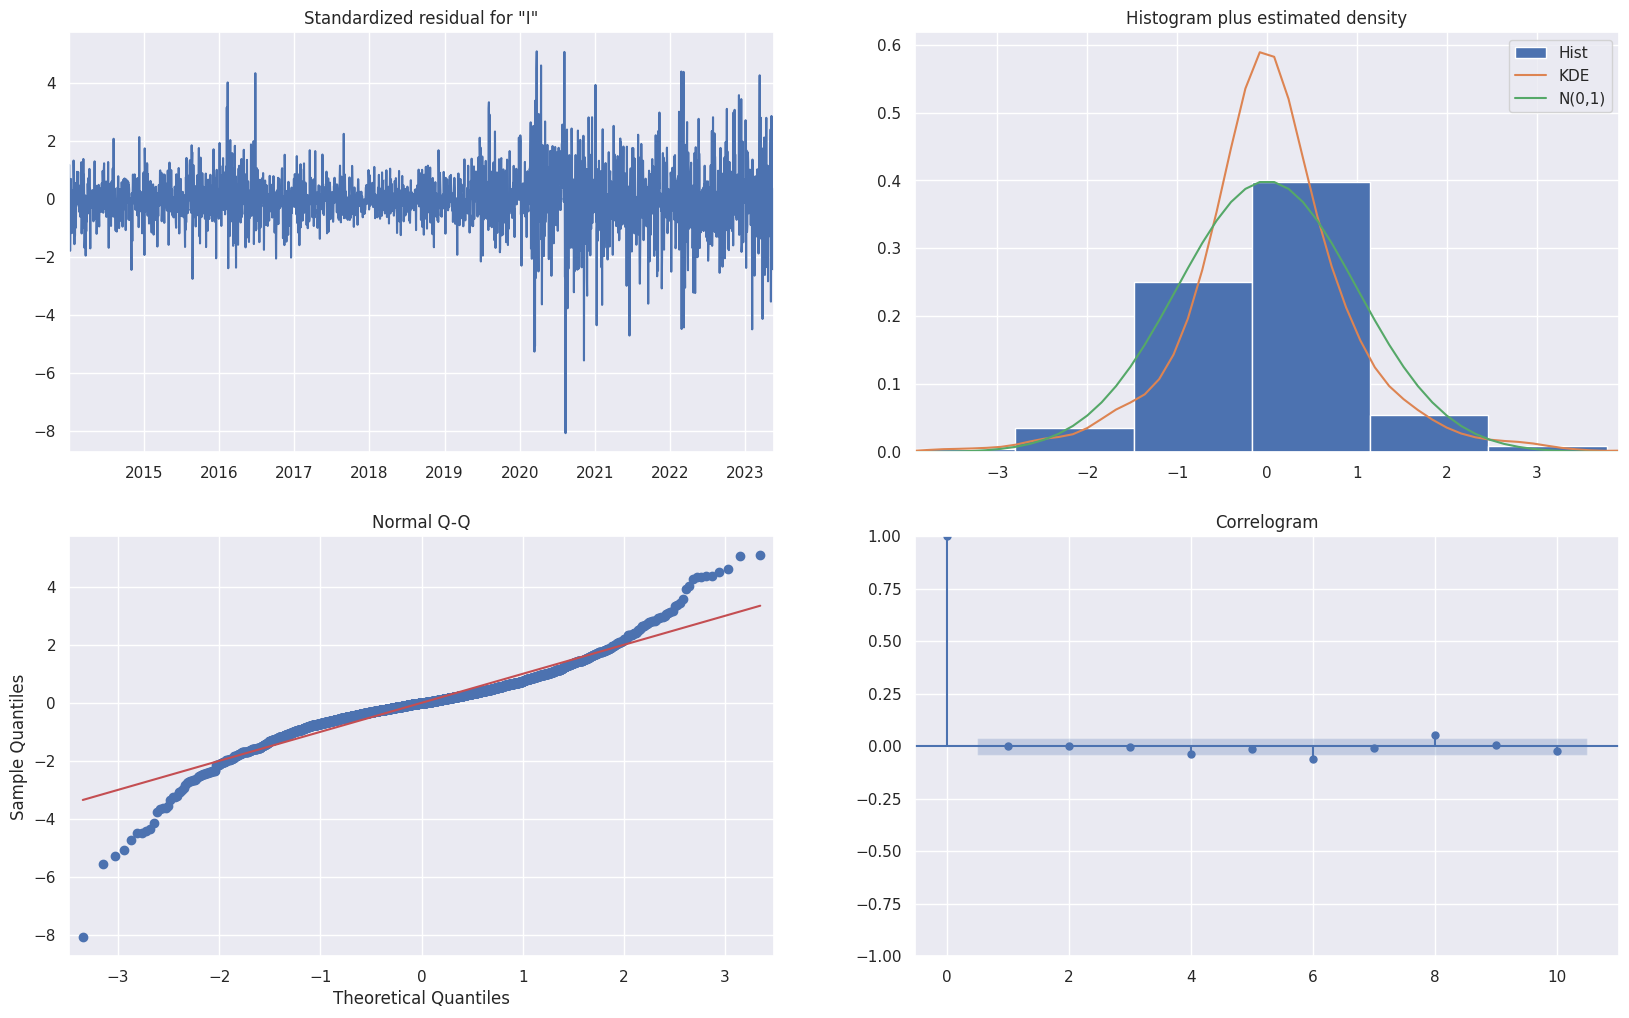

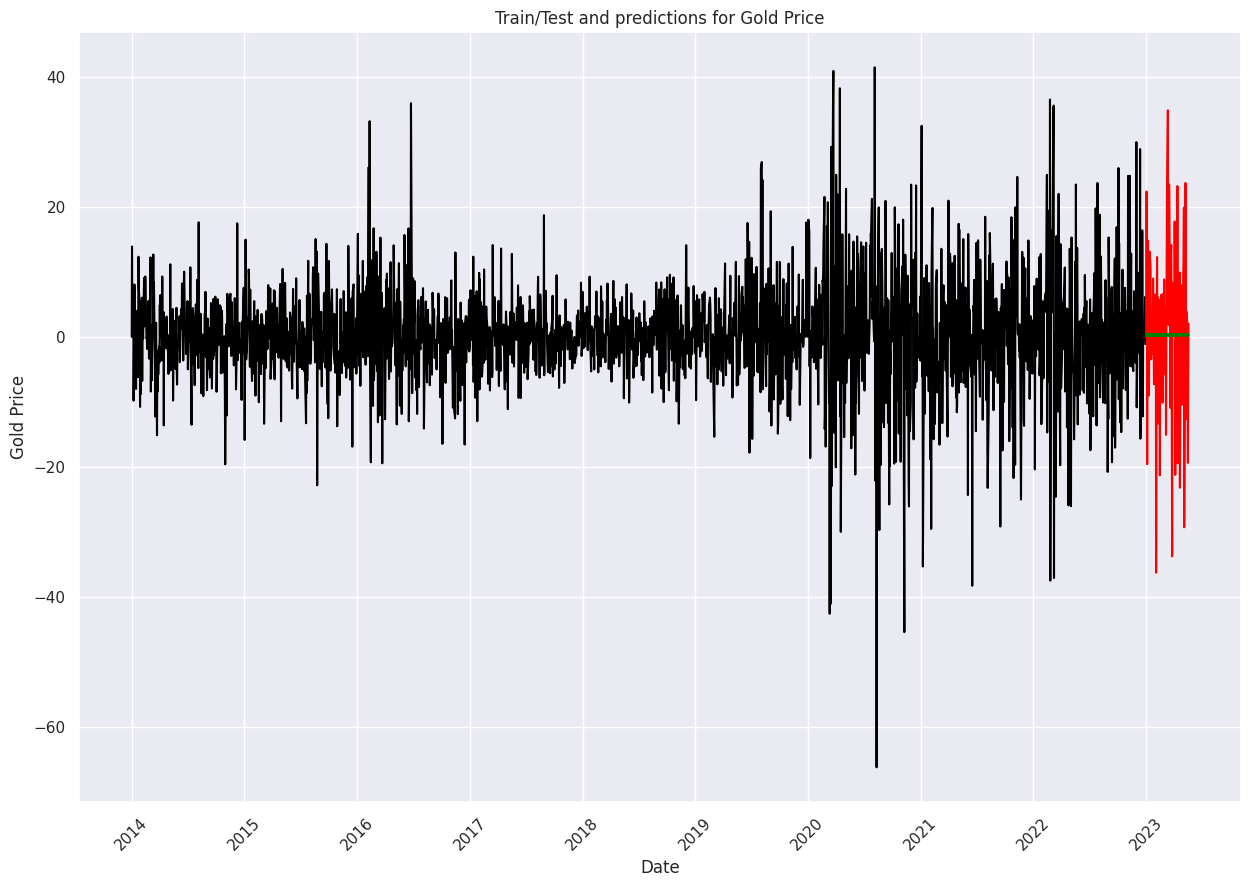

In [39]:
check_seasonal_order(2,1,2)

In [40]:
dataIndia = dataIndia.reset_index().drop(columns = 'INR_diff')
dataIndia.head()

,Date,Year,Month,Week,Day,Indian rupee
0,2014-01-01,2014,1,1,1,609.17
1,2014-01-02,2014,1,1,2,623.05
2,2014-01-03,2014,1,1,3,627.90
3,2014-01-06,2014,1,2,6,635.28
4,2014-01-07,2014,1,2,7,625.47


In [41]:
from sklearn.model_selection import train_test_split
x = dataIndia[['Year','Month','Week','Day']]
y = dataIndia[['Indian rupee']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 99)


In [42]:
 from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.841503193013859

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
from xgboost import XGBRegressor
xgb = XGBRegressor()
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [46]:
def evaluation_metrics(model):
 model.fit(x_train,y_train)
 y_pred = model.predict(x_test)
 mse = mean_squared_error(y_test,y_pred)
 rmse = np.sqrt(mse)
 mae = mean_absolute_error(y_test,y_pred)
 r2score = r2_score(y_test,y_pred)
 trainscore = model.score(x_train,y_train)

 print(f'Mean Squared Error = {mse}')
 print(f'Mean Absolute Error = {mae}')
 print(f'Root Mean Squared Error = {rmse}')
 print(f'r2 score = {r2score}')

 Comparison = x_test.copy("deep")
 Comparison['Actual Price'] = y_test
 Comparison['Predicted Price'] = y_pred

 sns.lineplot(Comparison, x = 'Year',y = 'Actual Price')
 sns.lineplot(Comparison, x = 'Year',y = 'Predicted Price')
 plt.legend(['Actual Price','','Predicted Price'])
 plt.show()

 return {'Training Score': trainscore,
 'Testing Score': r2score}


In [47]:
results = {}


Mean Squared Error = 7985.635733892554
Mean Absolute Error = 74.62807807771975
Root Mean Squared Error = 89.36238433419597
r2 score = 0.841503193013859


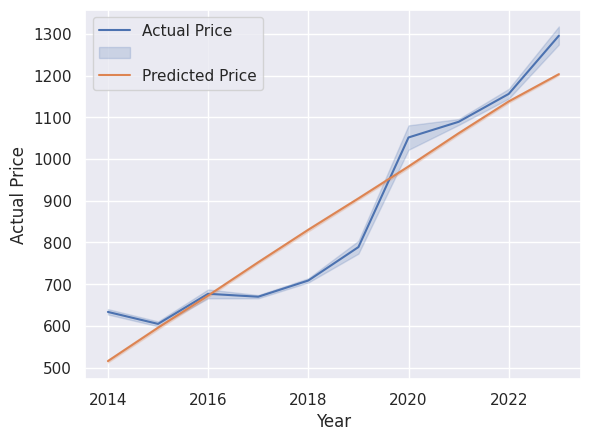

In [48]:
results['Linear Regression'] = evaluation_metrics(model)

Mean Squared Error = 76.07302102040815
Mean Absolute Error = 5.895979591836736
Root Mean Squared Error = 8.721984924339651
r2 score = 0.9984901225987117


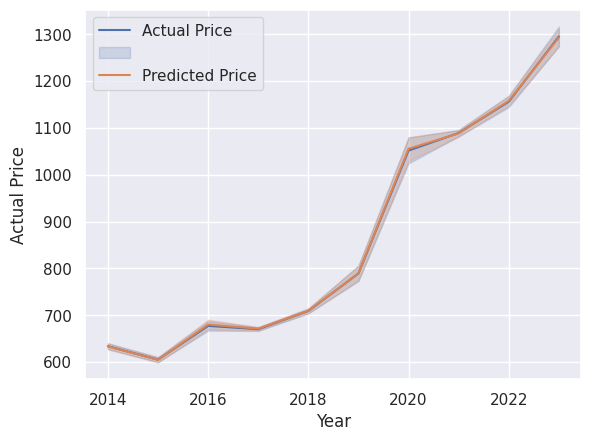

In [49]:
results['Decision Tree Regressor'] = evaluation_metrics(dtr)


Mean Squared Error = 71.19510145338755
Mean Absolute Error = 5.588366122448929
Root Mean Squared Error = 8.437718972174148
r2 score = 0.9985869382689816


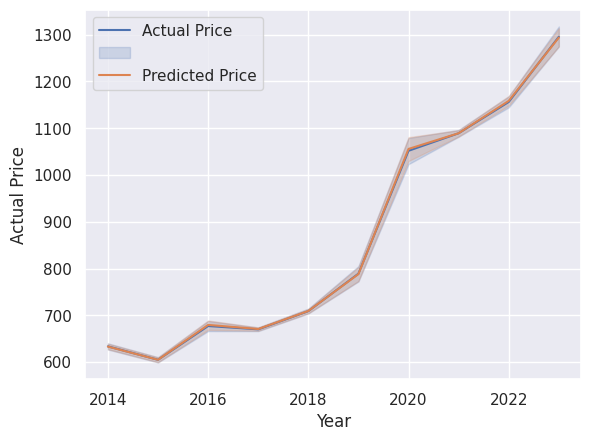

In [50]:
results['Random Forest Regressor'] = evaluation_metrics(rfr)

Mean Squared Error = 118.77280249051059
Mean Absolute Error = 7.043084093989156
Root Mean Squared Error = 10.89829355864993
r2 score = 0.9976426285171456


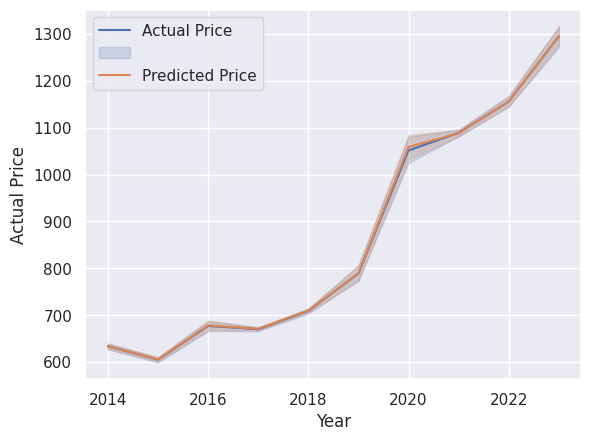

In [51]:
 results['XGB Regressor'] = evaluation_metrics(xgb)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 1958, number of used features: 4
[LightGBM] [Info] Start training from score 845.667390
Mean Squared Error = 132.88575799566127
Mean Absolute Error = 8.35661415136721
Root Mean Squared Error = 11.527608511554392
r2 score = 0.9973625182717947


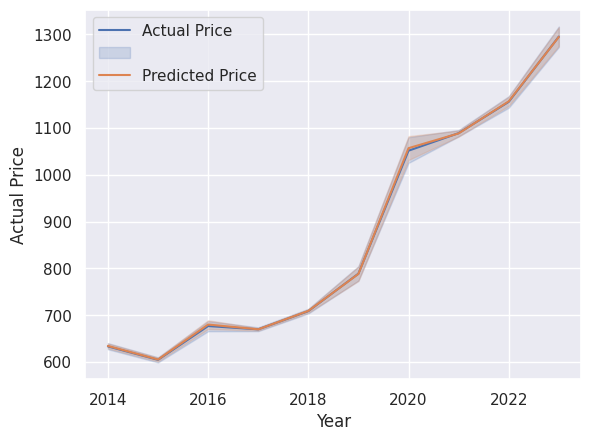

In [52]:
 results['LGBM Regressor'] = evaluation_metrics(lgbm)


In [53]:
resultsdf = pd.DataFrame(results)
resultsdf


,Linear Regression,Decision Tree Regressor,Random Forest Regressor,XGB Regressor,LGBM Regressor
Training Score,0.849397,1.00000,0.999792,0.999742,0.998575
Testing Score,0.841503,0.99849,0.998587,0.997643,0.997363


In [55]:

time_data = dataIndia[['Date','Indian rupee']]
time_data.columns = ['ds','y']
time_data.head()


,ds,y
0,2014-01-01,609.17
1,2014-01-02,623.05
2,2014-01-03,627.90
3,2014-01-06,635.28
4,2014-01-07,625.47


In [56]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
model_fit = m.fit(time_data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpndc7173r/97ffwhgc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndc7173r/b_8eq11v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18329', 'data', 'file=/tmp/tmpndc7173r/97ffwhgc.json', 'init=/tmp/tmpndc7173r/b_8eq11v.json', 'output', 'file=/tmp/tmpndc7173r/prophet_model2o_s8vgs/prophet_model-20240301235733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:57:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:57:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
 forecast = model_fit.predict(time_data)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
2443,2023-05-15,1281.463070,1315.503594,1247.312297
2444,2023-05-16,1281.650931,1315.395695,1246.227445
2445,2023-05-17,1281.323278,1317.682575,1245.725177
2446,2023-05-18,1281.594446,1313.787948,1246.595386
2447,2023-05-19,1280.840534,1314.091108,1248.462772


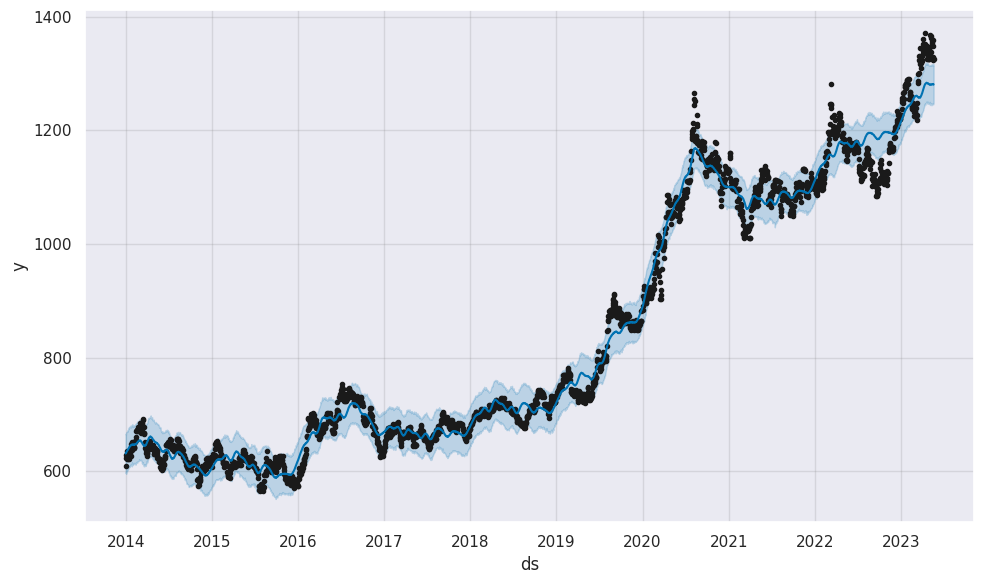

In [58]:

model_fit.plot(forecast);

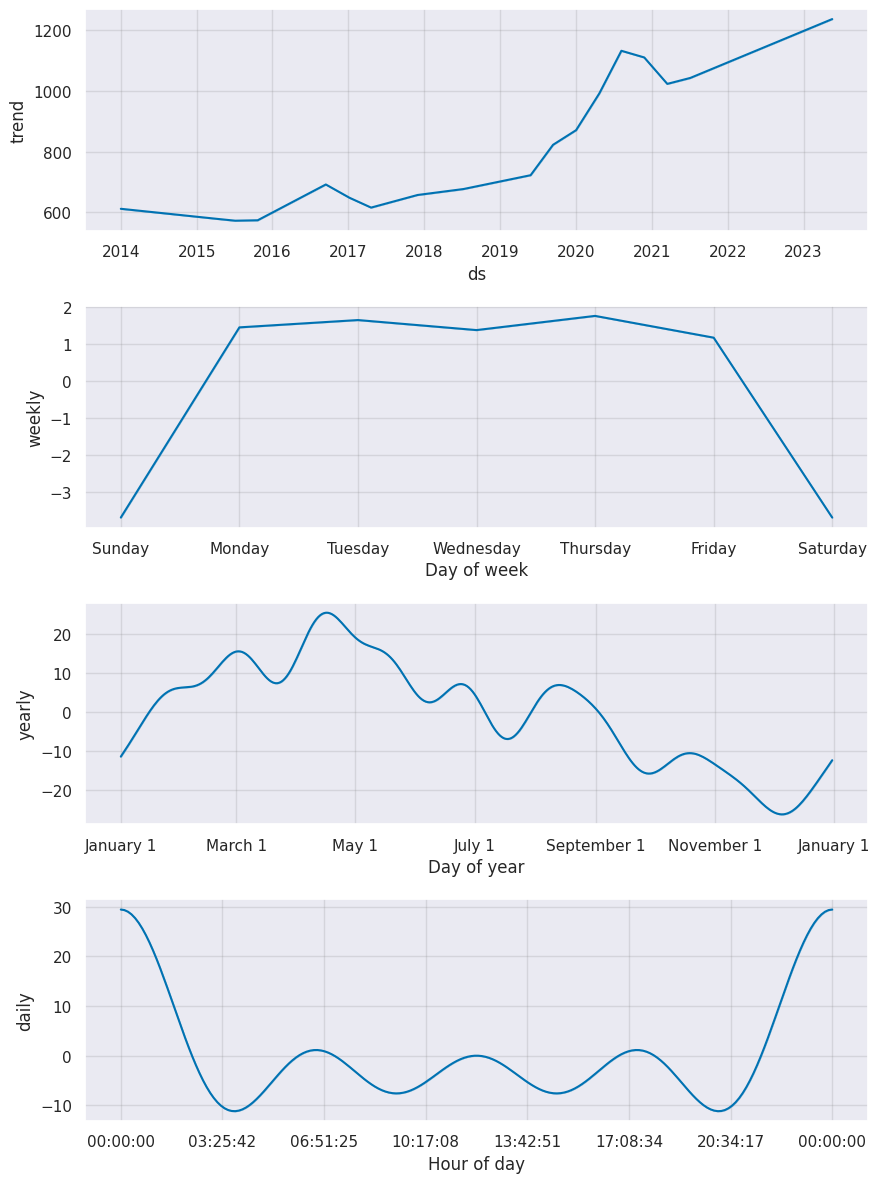

In [59]:
model_fit.plot_components(forecast);

Month of June and August are awesome

In [60]:
m2 = Prophet(daily_seasonality=True)
m2.fit(time_data)
future = m2.make_future_dataframe(periods = 336)
future.tail(10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpndc7173r/_luv2tg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndc7173r/za1sjauc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94471', 'data', 'file=/tmp/tmpndc7173r/_luv2tg3.json', 'init=/tmp/tmpndc7173r/za1sjauc.json', 'output', 'file=/tmp/tmpndc7173r/prophet_model95n9cmsg/prophet_model-20240301235934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:59:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:59:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
2774,2024-04-10
2775,2024-04-11
2776,2024-04-12
2777,2024-04-13
2778,2024-04-14
2779,2024-04-15
2780,2024-04-16
2781,2024-04-17
2782,2024-04-18
2783,2024-04-19


In [61]:
forecast2 = m2.predict(future)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
2779,2024-04-15,1386.413016,1529.217145,1251.170127
2780,2024-04-16,1386.961398,1536.254024,1251.226919
2781,2024-04-17,1386.928609,1534.366873,1245.577840
2782,2024-04-18,1387.441381,1532.063182,1247.029950
2783,2024-04-19,1386.888422,1537.965187,1250.659497


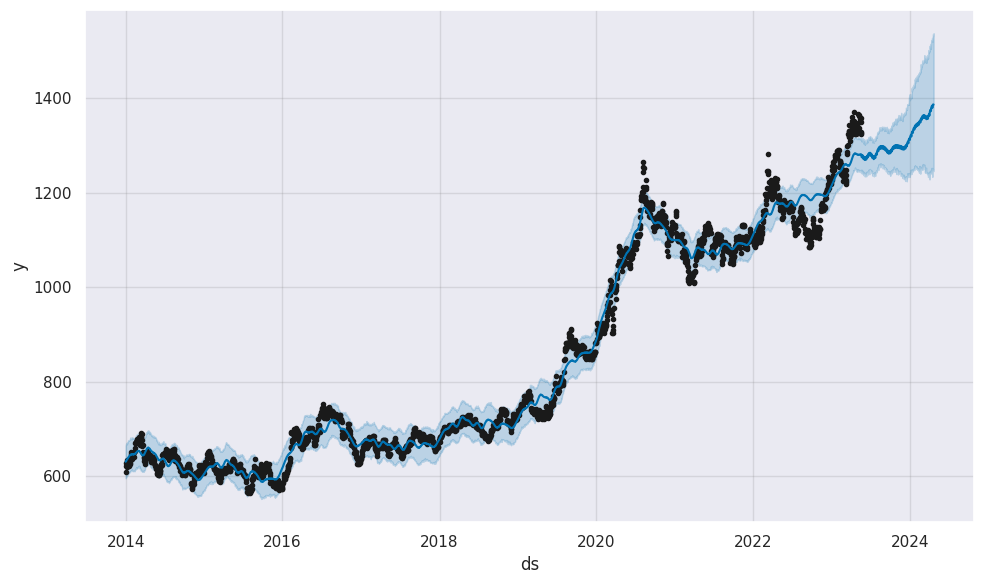

In [62]:
m2.plot(forecast2);


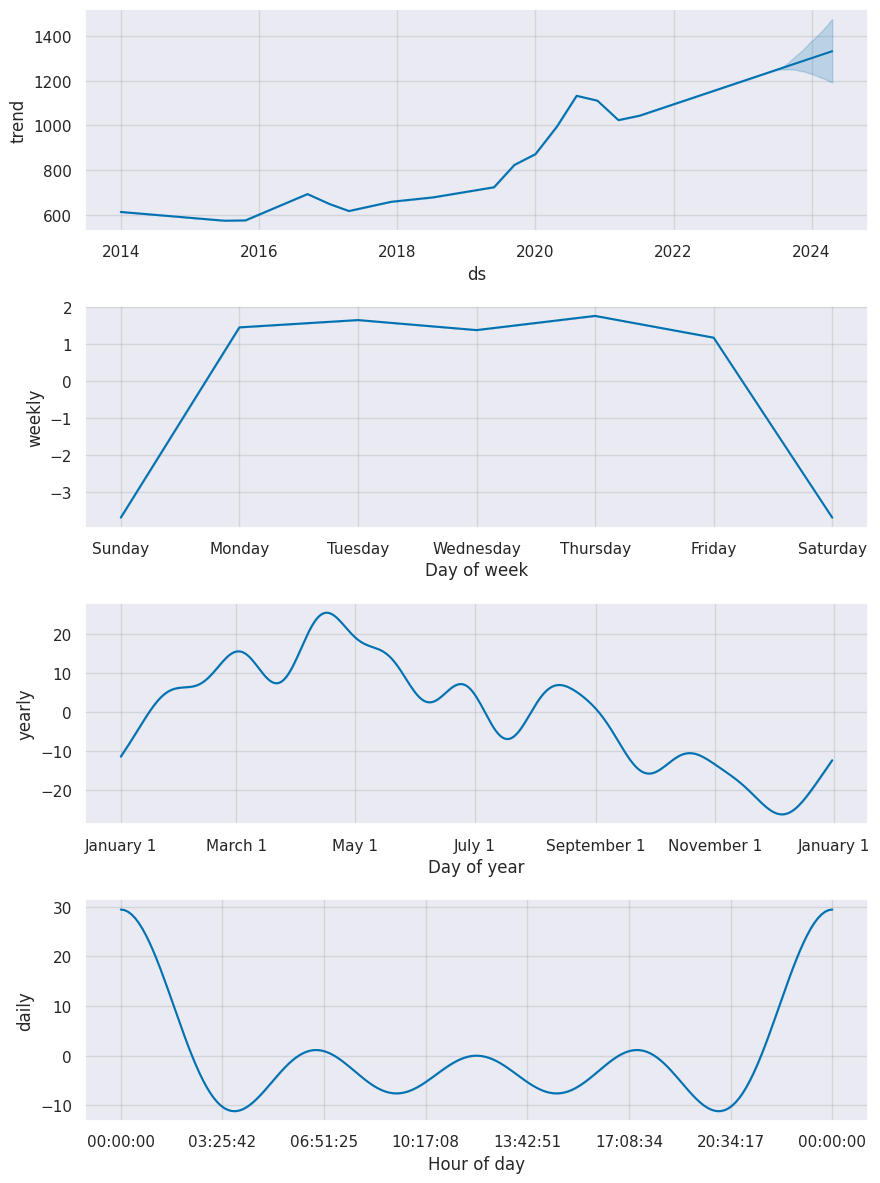

In [63]:
m2.plot_components(forecast2);

In [64]:
predictions = forecast2[['ds','yhat']]
predictions = predictions.rename(columns = {'ds':'Date','yhat':'Indian rupee'})
predictions.head()

,Date,Indian rupee
0,2014-01-01,631.024207
1,2014-01-02,632.087207
2,2014-01-03,632.189751
3,2014-01-06,634.585710
4,2014-01-07,635.506705


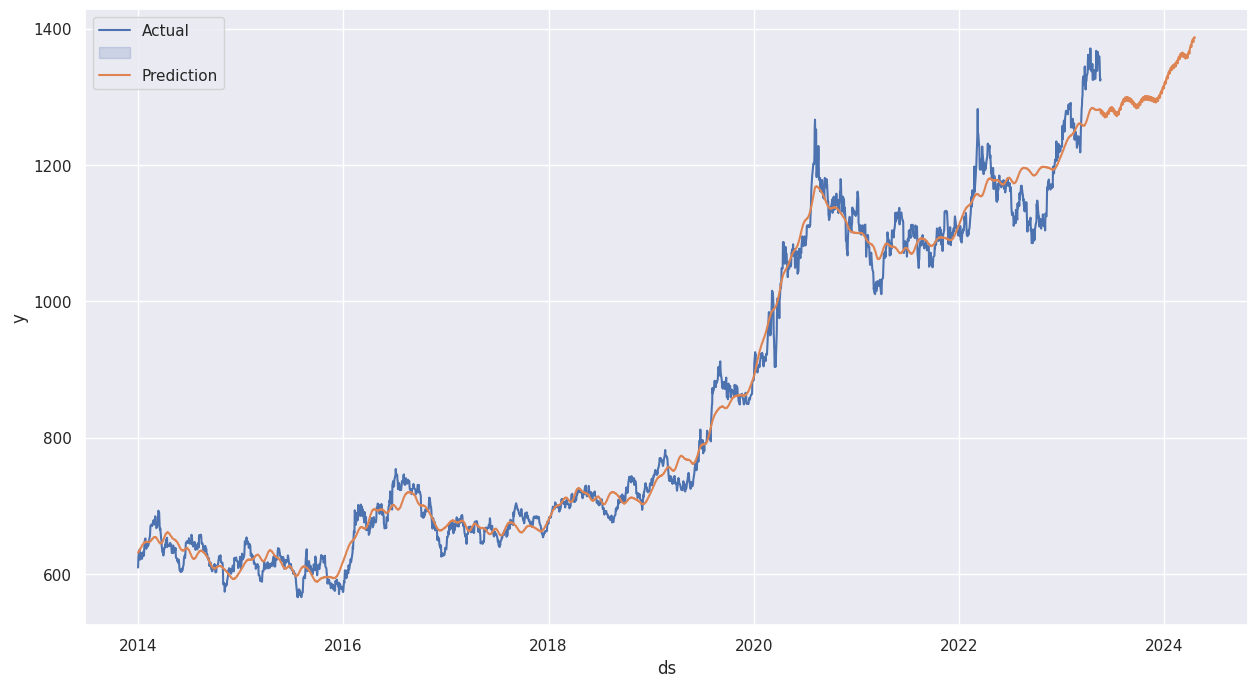

In [65]:
plt.subplots(figsize = (15,8))
sns.lineplot(time_data,x = 'ds',y='y',legend='full')
sns.lineplot(predictions,x = 'Date',y = 'Indian rupee',legend='full')
plt.legend(labels = ['Actual','','Prediction'])
plt.show()

In [66]:
predictions['Date'] = pd.to_datetime(predictions['Date'])
predictions['Year'] = predictions['Date'].dt.year
predictions['Month'] = predictions['Date'].dt.month
predictions['Week'] = predictions['Date'].dt.week
predictions['Day'] = predictions['Date'].dt.day


In [67]:
x_time = predictions.drop(columns=['Date','Indian rupee'])
y_time = predictions[['Indian rupee']]

In [68]:

x_time_train,x_time_test,y_time_train,y_time_test = train_test_split(x_time,y_time,test_size=0.2,random_state=99)

In [69]:
rfr_time_model = RandomForestRegressor()
rfr_time_model.fit(x_time_train,y_time_train)
rfr_time_pred = rfr_time_model.predict(x_time_test)

Mean Squared Error = 71.05915672961235
Mean Absolute Error = 5.613461020408121
Root Mean Squared Error = 8.429659348373002
r2 score = 0.9985896364642617


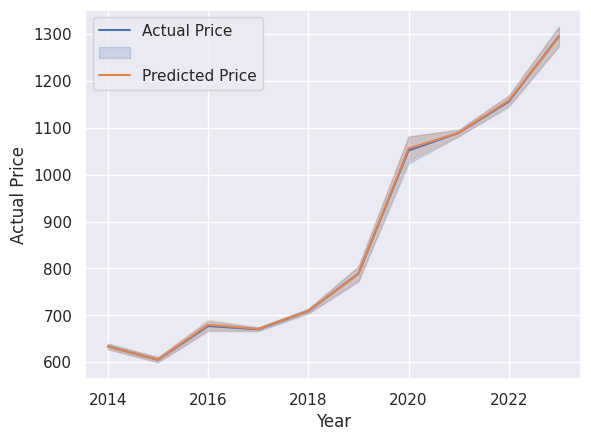

In [70]:
 results['Random Forest Evaluation Regressor'] = evaluation_metrics(rfr_time_model)

In [71]:
 del results['Linear Regression']
del results['Decision Tree Regressor']
del results['XGB Regressor']
del results['LGBM Regressor']

In [72]:
results

{'Random Forest Regressor': {'Training Score': 0.9997919054141126,
  'Testing Score': 0.9985869382689816},
 'Random Forest Evaluation Regressor': {'Training Score': 0.9997910197995105,
  'Testing Score': 0.9985896364642617}}

In [73]:
CompareRFR = pd.DataFrame(results)
CompareRFR

,Random Forest Regressor,Random Forest Evaluation Regressor
Training Score,0.999792,0.999791
Testing Score,0.998587,0.998590
